In [7]:
import nest_asyncio
nest_asyncio.apply()
#twint를 사용하기 위한 라이브러리

In [4]:
import pandas as pd
import re
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk import word_tokenize
from nltk.corpus import stopwords
stopword_list = stopwords.words('english')
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import wordnet
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import datetime

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\LG그램\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LG그램\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
# twint를 이용하여 언제부터 언제까지 tweet들을 크롤링할것인가?
# 어떤 회사를 추천받고 싶은가?
since = input("since(2021-06-21처럼 입력) : ")
until = input("until(2021-06-21처럼 입력) : ")
company = input("What company do you want to get a recommendation? : ")

since(2021-06-21처럼 입력) : 2021-06-09
until(2021-06-21처럼 입력) : 2021-06-12
What company do you want to get a recommendation? : tesla


In [10]:
import twint
# twint를 사용한 크롤링
c = twint.Config()

#어떤 회사에 대한 내용을 크롤링 할 것인가?
c.Search = company

#얼만큼 크롤링 할 것인가?
c.Limit = 10000

#언제부터 언제까지의 tweet을 크롤링 할것인가?
c.Since = since
c.Until = until

c.Output = 'Tweet.csv'
c.Pandas = True

#크롤링 시작
twint.run.Search(c)

1403502284361932800 2021-06-12 08:59:55 +0900 <ChrisNalley7> @Investments_CEO If only dogecoin were more than just if. Always if questions from everyone. Doge is destined for greatness, get the if out your mouths. WHEN tesla accepts, WHEN coinbase wakes up. WHEN the doubters say shoulda woulda could. Then don't ask just DO.
1403502273557417986 2021-06-12 08:59:52 +0900 <mentalbrethmint> @SyncSam123 @MonkeyTreeFrog @And6Is9 @Keem_113 @tesla_johnny  https://t.co/G3PArwugR0
1403502270126428167 2021-06-12 08:59:51 +0900 <Jason_lloydd> @Starbuk99 @WilliamRoark17 @Teslarati @Tesla Bro I’m more of a blue collar worker than you’ll ever be. You lost that battle real quick. I don’t even need to know what you do to gaurentee that my hands get dirtier doing a much cooler job, probably for better wages 💁🏻‍♂️ also majority of truck buyers don’t work on farms 😂
1403502258617257986 2021-06-12 08:59:48 +0900 <thaynacrissilva> Tesla tudo que eu faço essa droga de cena detesta
1403502246818635776 2021-06

1403501441684172801 2021-06-12 08:56:34 +0900 <AdrianStarr108> @KryptoPunkz @elonmusk @Tesla @undergroundraci There's a 2008 Audi RS6 Lambo engined V10 twin turbo I'm looking at next week...may buy it. It's only 35k nzd
1403501434071445505 2021-06-12 08:56:32 +0900 <MettiRamsey> @TiTaniumT98 thank you for your welcome to #RamsHouse yesterday while going in the lot @sofi!! Little groggy after the drive from san diego but great way to start the event!!! #tesla #Rams
1403501415994212352 2021-06-12 08:56:28 +0900 <IheartTesla> @TeslaPhx @tesla_raj @elonmusk @jeremyjudkins @woodhaus2 @jrosinski97 @UNPLGD3 @klwtts @daelmor @daily_hopper @notjustplanetA ICE cars Sorry I had to go there. 😂
1403501385434374144 2021-06-12 08:56:20 +0900 <midderska> @elonmusk @rknapp_12 @Tesla @thirdrowtesla Still coming soon?
1403501384125853711 2021-06-12 08:56:20 +0900 <LucianaSalles4> Tesla’s New TeraFactory In Austin, Texas  https://t.co/RK4TOzdEPw via @YouTube
1403501382683009025 2021-06-12 08:56:20 +0900 <

1403500875268640768 2021-06-12 08:54:19 +0900 <awatefh1> @GaweishA @XfaisalhamadX @sari26608507 @kkhaled_fathy @aboshthaaa @v1LNNnRW4iWaTcG @Lahnamal @U4h9BdtnyzT05JL @khaledH60466031 @osamah32568005 @gh_11azal @mohammedabdo140 @hamadamosbahya2 @8Ue5vbFp2a7vlfs @ksa8739 @LVYdkXNbBewlYRl @cDi5TTNDsoKtOKt @GN30jZWPnG6jLzm @vFWWb9nixhDUPnk @aalsalm182 @hoor55566 @aboshathaaa @Alii_0099 @Abo_Hamad1001 @ALHUSSEINSA1 @Salah0100Abdou @almutawakil9 @l_o_l_o00 @N_Tesla_N_3_6_9 @xM3iIUOmiGgiWKB @XpWOdyqLMx7yIL4 @al3yasheee @layla_al3amer @ExLXOGaY794PEl4 @mona_abdullah97 @waladrwsh148731 @MmmFa72 @AliALamin10 @monthrs @MahmoodShihab @K1mtqY8Idj4iXtn @TunaHanem @lahno_alamal @WWHkfPWZ0bKyhj2 @AlquwayfiliM @WaladRwsh2020 @abosoade65861ma @tG9uX9LN2a4VZ58 @safyaljhwary @Mervat44594894  https://t.co/jnyaiN5btJ
1403500833589837824 2021-06-12 08:54:09 +0900 <Lahnamal> @awatefh1 @XfaisalhamadX @osamah32568005 @U4h9BdtnyzT05JL @aboshthaaa @gh_11azal @GaweishA @MahmoodShihab @khaledH60466031 @mohammedabd

1403499999481245702 2021-06-12 08:50:50 +0900 <awatefh1> @LVYdkXNbBewlYRl @U4h9BdtnyzT05JL @cDi5TTNDsoKtOKt @8Ue5vbFp2a7vlfs @mohammedabdo140 @XfaisalhamadX @fodiifhd @osamah32568005 @Lahnamal @aboshthaaa @gh_11azal @GaweishA @MahmoodShihab @khaledH60466031 @kkhaled_fathy @v1LNNnRW4iWaTcG @hamadamosbahya2 @ksa8739 @GN30jZWPnG6jLzm @vFWWb9nixhDUPnk @aalsalm182 @hoor55566 @aboshathaaa @Alii_0099 @Abo_Hamad1001 @ALHUSSEINSA1 @Salah0100Abdou @almutawakil9 @l_o_l_o00 @N_Tesla_N_3_6_9 @xM3iIUOmiGgiWKB @XpWOdyqLMx7yIL4 @al3yasheee @layla_al3amer @ExLXOGaY794PEl4 @mona_abdullah97 @waladrwsh148731 @MmmFa72 @AliALamin10 @monthrs @K1mtqY8Idj4iXtn @TunaHanem @lahno_alamal @WWHkfPWZ0bKyhj2 @AlquwayfiliM @WaladRwsh2020 @abosoade65861ma @sari26608507 @tG9uX9LN2a4VZ58 @safyaljhwary  https://t.co/13dJgYBPfj
1403499977280823307 2021-06-12 08:50:45 +0900 <exclusivelybill> Tesla’s a meme
1403499969705820166 2021-06-12 08:50:43 +0900 <bigbluebox88> @greg16676935420 @Tesla @SlimJim @OREOS I eagerly await th

1403498609774059526 2021-06-12 08:45:18 +0900 <DuyLinh62270006> @nikkidoescrypto @dorsetphoto_JLP @tietohiir @kylecoolky @SuperSaf @elonmusk @Tesla @nikki So now we're comparing a used Lambo/Ferrari with decade-old tech with a brand new car with the latest, top of the line tech? You want to buy a older, slower car for the same price?
1403498607555186690 2021-06-12 08:45:18 +0900 <italianmaster> @JCKerrigan_LA @Plumazul @Toyota Since ZEV credits are earned (and then sold) from selling BEVs, Tesla has made 8 straight quarters of profit in a row based on vehicle sales.
1403498604283805696 2021-06-12 08:45:17 +0900 <mehabecapital> Tesla is using a new 12V Lithium-ion battery in the Model S Plaid – chatter @ #wallstreetbets  https://t.co/cpykAfJIO3
1403498531147567107 2021-06-12 08:45:00 +0900 <SpokesmanReview> A man died Thursday evening when the Tesla he was driving crashed into a fence south of Interstate 90 on the West Plains.  https://t.co/8WxJmzr24P
1403498519835529216 2021-06-12 08:4

1403497973514784769 2021-06-12 08:42:47 +0900 <XOJanetDavisOX> @greg16676935420 @DogecoinRise @Tesla @SlimJim 🤣 I can only imagine what the full size truck does! 🥳
1403497950475657224 2021-06-12 08:42:41 +0900 <StonksReddit> @greg16676935420 @Tesla @SlimJim Without watching I believe u
1403497927641907204 2021-06-12 08:42:36 +0900 <Plumazul> @Starbuk99 @Teslarati And with @Tesla , there will ALWAYS be a glitch
1403497925821579273 2021-06-12 08:42:35 +0900 <innowatcher> #Innovate: @AlexSibila: 'Progression of #Tesla cockpits from 2008 to 2021! @elonmusk @Tesla continue to innovate! '  https://t.co/s92GBJaNfw, see more  https://t.co/FrPQlfbyvj
1403497913469263874 2021-06-12 08:42:32 +0900 <TylerChess> Tesla driver crashes into NYC senior home, killing passenger - New York Daily News   Guys pls   they’re fast but learn how to control these beasts   https://t.co/n60tHaxAaN
1403497906259255297 2021-06-12 08:42:31 +0900 <LISTENBEF0REIG0> @OLDXM3 sto col culo su una Tesla
1403497901637124102 

1403497288345944072 2021-06-12 08:40:03 +0900 <Numenor33> @TeslaPhx @Thunder7ga @tesla_raj @elonmusk @jeremyjudkins @woodhaus2 @jrosinski97 @UNPLGD3 @klwtts @daelmor @daily_hopper @notjustplanetA I love Cashews, but hate Cashew Butter, so I understand
1403497283421982723 2021-06-12 08:40:02 +0900 <Quotenet> Nieuwste Tesla Model S Plaid zit vol beloftes: ‘Sneller dan een Porsche, veiliger dan een Volvo’  https://t.co/4yQ9mDOLuL  https://t.co/tbplQY7muO
1403497268674805765 2021-06-12 08:39:59 +0900 <isaiahmlouis> @jtmellas @SANUKAdeTEKA @SuperSaf @elonmusk @Tesla Because they’ve built, and are going to build hundred of thousands.   Stop comparing price.... because it literally means nothing.
1403497264002314243 2021-06-12 08:39:58 +0900 <WokeSurge> @TayOnTech Tesla , if you’re into puns and your name “ Queu Tay” The e is silent and left out 😎
1403497252539277315 2021-06-12 08:39:55 +0900 <shawnrome1> @LorettaCrypto TESLA
1403497248735076356 2021-06-12 08:39:54 +0900 <grrudho> @kimpaquett

1403495684028915712 2021-06-12 08:33:41 +0900 <nstrhn> @CanturkYay @HaymatlosK Hakim sistemin işine yaramadı diye benim ortaya koyduğum şey değersizdir diye bir şey yok. Tesla-edison hadisesi güzel bi örnek buna. Edison ödüllendirildi fakat teslanın hakkı yendi. Ödüllendirilmek başka şey hak etmek başkanın karşılığı budur işte.
1403495665360060419 2021-06-12 08:33:36 +0900 <Paulusdmc42> @cleevelyev @JoeBourton @She_sElectric @KateFantom @pluginadventure @JordeeBrompton @Tesla_Gurus @TeslaOwnersUK @DavidDu94682527 @ElectrifyingCom @FullyChargedShw Looks alright , your daughter looks double jointed lol 😉
1403495660125659141 2021-06-12 08:33:35 +0900 <shawnrome1> Elon @elonmusk I will buy a Tesla when I can afford it with DOGECOIN! #AcceptDoge #Doge4Tesla  Can you make this happen? #dogecoin #DogeFamily #Elonmusk #Tesla  https://t.co/Q1re2FHbZV
1403495657961316356 2021-06-12 08:33:35 +0900 <evtaxi> Sweden-based EV Battery Startup Northvolt, Founded by Former Tesla Execs, Raises $2.75 Bill

1403494886293217283 2021-06-12 08:30:31 +0900 <RandyTreibel> @QTRResearch That is literally the best and most reasonable Tesla mod I've seen so far among all the poors.
1403494868345921540 2021-06-12 08:30:26 +0900 <BillSPACman> @greg16676935420 @Tesla @SlimJim the fridge ate them
1403494859340533762 2021-06-12 08:30:24 +0900 <GenaroC76872834> @LoneWatchmen @ebs8ur @BTC_Archive @kevinolearytv Do any of them fly? I heard a new Tesla does.
1403494857503608839 2021-06-12 08:30:24 +0900 <kylecoolky> @nikkidoescrypto @George66170467 @dorsetphoto_JLP @SuperSaf @elonmusk @Tesla The only maintenance Teslas have are tires, breaks, and washer fluid. Tires and washer fluid degrade just like any other car but even Teslas brakes last longer. They have what’s called regenerative braking where the car can break pretty heavily without ever engaging the brakes.
1403494848615780356 2021-06-12 08:30:22 +0900 <OrrusDev> @greg16676935420 @Tesla @SlimJim Is that a @boringcompany  tunnel underneath the fridg

1403494333437841408 2021-06-12 08:28:19 +0900 <imispgh> @TeslaOwnersNBay @Tesla @elonmusk For that narrow tunnel it makes sense with good IMU. But I would add beacons. For autopilot it’s basically the HD Map Elon skipped.
1403494333307932676 2021-06-12 08:28:19 +0900 <StanphylCap> @The_Blck_Swan No one said today’s two deaths were “the hardware.” It’s just laughable how Mr. Fraudsperger’s claims these are “the safest cars ever” and idiot Teslemmings who survive thank him for saving their lives, when Tesla’s death rate is likely a MULTIPLE of that of other new luxury cars
1403494331713982468 2021-06-12 08:28:19 +0900 <WOLF_Financial> @greg16676935420 @Tesla @SlimJim  https://t.co/7QaTli9zbJ
1403494331445481474 2021-06-12 08:28:18 +0900 <the_spacedoge> @greg16676935420 @Tesla @SlimJim Wow
1403494310046318597 2021-06-12 08:28:13 +0900 <titratecode> @greg16676935420 @Tesla @SlimJim woah hold your horses. the speed limit is 1.5 slims/mile
1403494306694971397 2021-06-12 08:28:13 +0900 <Erick

1403493316516368393 2021-06-12 08:24:16 +0900 <brilauv_> Prepare ur Tesla 😩
1403493277853122560 2021-06-12 08:24:07 +0900 <Sacfoodie916> @Erdayastronaut @Tesla @elonmusk Now what’s the range I. That battery
1403493272106921984 2021-06-12 08:24:06 +0900 <AhmadNorMaulana> Here's how Tesla's new Auto Shift works - Roadshow  https://t.co/zckE0wYU1w  https://t.co/FGuLaCihXg
1403493265677111298 2021-06-12 08:24:04 +0900 <travelhead> Kinda sketchy Tesla just turned on the cameras inside the car (for models that have it installed like Model 3). You’re being watched. Such a nasty invasion of privacy. They’re likely to require it on when you’re using autopilot.
1403493247989784577 2021-06-12 08:24:00 +0900 <tlake11> @DrKnowItAll16 @Tesla This is what caught my attention last night as the just one more thing with huge competitive implications.  https://t.co/5J7KxQzDxG
1403493196446015490 2021-06-12 08:23:48 +0900 <BigGazz11> @Erdayastronaut @Tesla @elonmusk Glad it’s you Elon.
1403493155459190794

1403491867598241796 2021-06-12 08:18:31 +0900 <EVracerX> @DriveEVColumbus @GreenEnergyOhio @YellowCabCbus @Tesla I want to see this!
1403491867388350468 2021-06-12 08:18:31 +0900 <helenthompson> #summerfun #volcano watch out for #Tesla  https://t.co/KMCOmiDXP5
1403491828788310022 2021-06-12 08:18:22 +0900 <OutWithDuckism> @thinkabouditt @DMC_Ryan @elonmusk @Tesla Not really. When you are the driver, it's completely different feeling, as you are prepared, cause you control the car &amp; it's acceleration. So it's never really sickening for the driver.
1403491813139353604 2021-06-12 08:18:18 +0900 <Kromatikus69> @Erdayastronaut @Tesla @elonmusk How does that steering wheel feel compared to a regular one?
1403491780797009925 2021-06-12 08:18:10 +0900 <reDogecoin> yes we love Elon Musk but his opposition to bitcoin has bad consequences for everyone. Do not upset the people who love you, BTC and Doge investors...  #dogearmy #dogecoin #Crypto #cryptocurrency #Bitcoin #btc #Elonmusk #tesla #D

1403489966848622592 2021-06-12 08:10:58 +0900 <_BRCooper> @TeslaChillMode @Tesla @elonmusk @TeslaOwnersEBay @SeasonedTech @tesla_m3friday @TeslaFrunk @TonyTesla4Life @CodingMark @MFrunker @SjvTesla @TeslaOwnersNBay I just came across this. It's so small but I guess that makes sense.   https://t.co/isu4qbTUG8
1403489950520197126 2021-06-12 08:10:54 +0900 <bakedbiscuit20> @dorsetphoto_JLP @edmunds @FordMustang @Tesla You rn  https://t.co/OPMIKxjZPT
1403489940613259265 2021-06-12 08:10:52 +0900 <LollyLouLove1> @DMC_Ryan @elonmusk @Tesla Got to get me one of those!!! W T F !🌠🌠🌠🌠⚡⚡⚡⚡💋👏
1403489936330874880 2021-06-12 08:10:51 +0900 <Tele92275175> @SmotWicket @garyblack00 Now everyone is noticeably catching up. The differences are marginal, if any. Why should Tesla's market share stay constant? Why should Tesla's margin stay constant?  I think Gary is too optimistic because of his long positioning 2/2
1403489921961062406 2021-06-12 08:10:47 +0900 <TeslaTomMY1> @TslaCybertruck @elonmusk I’d ra

1403489195813834757 2021-06-12 08:07:54 +0900 <Richard56162613> @macmover @CarlosF18930525 @Rbishop0425 @GRDecter Should GM and EV-1 get credit for being “first”? Sure, and it was a great effort. What did GM do when it was convinced it wouldn’t make any money? Watch “Who killed the electric car”. The Leaf is fine, not great. Musk and Tesla have pushed the industry forward at least 10 years.
1403489190654873604 2021-06-12 08:07:53 +0900 <CHADMCANON> @Kujiin1 @dfinity So… It’s the next Tesla… got it 👍
1403489181976858624 2021-06-12 08:07:51 +0900 <RIPMamBa__> @Mike20846347 @garyblack00 why is that? tesla already has an impairment loss booked at ~29,800 - don’t see any additional priced in EPS downside if BTC doesn’t drop below that - BTC currently trading ~25% above that level. i wouldn’t mind another 550 buying opportunity though.
1403489178831273989 2021-06-12 08:07:50 +0900 <ElmarMoelzer> @Kinbladez @doomer_boy @shaydenplant @patriach2051 Talking about manipulating the stock market. T

1403488540974067713 2021-06-12 08:05:18 +0900 <sethdye01> @elonmusk Tesla game controller needs the sticks offset. Ps5 controller only mistake.
1403488536054149135 2021-06-12 08:05:17 +0900 <l_Monk_l> @ThatOneGuyDrew1 @DimaZeniuk @elonmusk @Tesla @EvaFoxU @1stMarsColonist @Kristennetten @AustinTeslaClub @28delayslater @melaniemadri @Nikola_Truth @Model3Owners  https://t.co/GCJUXEZJjI
1403488536012083203 2021-06-12 08:05:17 +0900 <MocaTesla> ちなみにこのバッグです。 1年前はModel3並の人気でなかなか入荷せずかなり待ちました。 使い勝手がすごく良くて気に入ってます💕 既にPlaidの登場を知っていたかのようなデザイン😂  #Plaid #TESLA #JAL   https://t.co/nYqWtL9WVu
1403488529842323459 2021-06-12 08:05:15 +0900 <gastonpatricio3> Un departamento, oro e incluso un Tesla: los increíbles premios que se sortearán en Hong Kong para aquellos que se vacunen -  https://t.co/Z8YDcm2Z3w vía @thecliniccl
1403488443708186635 2021-06-12 08:04:55 +0900 <ChikuChill> It’s not the love you make. It's the love you give. - Nikola Tesla  https://t.co/ui6YSqmXbx
1403488419028815880 2021-06-12 08:

1403487413033324549 2021-06-12 08:00:49 +0900 <Kingman55960942> @Tesla Only thing beyond ludicrous is plaid
1403487388245102592 2021-06-12 08:00:43 +0900 <Behnam30443456> @Tesla @elonmusk  https://t.co/JKEKhfLfO7
1403487387775246339 2021-06-12 08:00:43 +0900 <DougNagels> @RocketRacer10 @FelixSchlang @elonmusk Tesla built the gigafactorys and lease /partnership with Panasonic there's a whole documentary on YouTube about it. Yes Tesla doesn't manufacturer by themselves but to keep cost down they get inhouse partners to do it for them... Smooth move @elonmusk
1403487368057741312 2021-06-12 08:00:38 +0900 <rohan_kumawat> Tesla's engineers are 💥😵
1403487367365685248 2021-06-12 08:00:38 +0900 <MocaTesla> @RockCircle6 これ実はJALのCAさんのスカーフをモチーフにしたエコバッグなんですよ😊 JALのスカーフからインスパイアされたのかしら🤔 #違う #TESLA #Plaid  https://t.co/SeHOdNfwtx
1403487339708624898 2021-06-12 08:00:31 +0900 <CoinProjectz> CP!- TESLA BUYS BITCOIN AND BTC PRICE GOES BOOM! #bitcoin #bitcoinnews #blockchain #crypto  https://t.co/Q5mAysMn

1403486499761528832 2021-06-12 07:57:11 +0900 <mafecrv> @Thee_Monday fui visitar minhas origens hoje e o tesla tava carregando 🤩
1403486488785002500 2021-06-12 07:57:09 +0900 <_juanmax_> @WillFealey @Tesla @elonmusk Will, we know you wanted an Y badly, but can not wait to have them available in the UK ;) so to me like the perfect bridge. Congrats!!
1403486486490607616 2021-06-12 07:57:08 +0900 <sharpeclipse> TESLAの思想はほんと大好きだし、趣味では買いたいけど、メインでは買いたくない
1403486481847517186 2021-06-12 07:57:07 +0900 <phsiao4> Tesla dealership Model Y  https://t.co/wf9NyKVeBT
1403486480207474690 2021-06-12 07:57:07 +0900 <GFY20201> @flyingwatermel3 @man_theta @LucidMotors Knock knock... Tesla is already building vehicles... Lucid has yet to sell one car yet🤦‍♂️🤷🤷🤷
1403486472007827461 2021-06-12 07:57:05 +0900 <onecarlost82> @berni1028 @KingMidasSMOON @MarcNietoBrand @SaylorMoonArmy @elonmusk‘s Spaceman and @SaylorMoonArmy driving a @Tesla to the Moon 🌝
1403486461568057344 2021-06-12 07:57:02 +0900 <sargonas> 

1403485553870389248 2021-06-12 07:53:26 +0900 <YoungOpulence> If anyone knows about time &amp; speed  its @elonmusk then hes aware in 50yrs his vision of @tesla is at risk when everyone has their own personal flying car. Flying car will always win the race then people will call uber for last mile destination. Tesla should invest in a flying..
1403485541140549632 2021-06-12 07:53:23 +0900 <nazmuchhhh> @Edwin_Honoret tesla BRUTHAAASSSSSS @zion_kuwonu
1403485534475935745 2021-06-12 07:53:21 +0900 <jnadoGeb> 0-60mph in 2 seconds! 1,020bhp engine! 😲 Note the cockpit steering. 😎 A girl can dream, right?  I'm digging the Spaceballs reference too! 😆 Let's go! #tesla #teslamodelsplaid  https://t.co/ARmjq0qSGG
1403485526930362370 2021-06-12 07:53:19 +0900 <VersusMex> AudioClash: Battle of the Bands ha sido anunciado  https://t.co/qwZJniCR1h The Living Tombstone anunció AudioClash: Battle of the Bands, el videojuego de competición de música rock free-to-play.  Los personajes de ficción de The Liv

1403484735968514051 2021-06-12 07:50:11 +0900 <rapEfuteboI> tesla rozaliya e liliya   https://t.co/tiAUjR7F1a
1403484731363237890 2021-06-12 07:50:10 +0900 <KDavidWest> @AstroJordy @elonmusk @Tesla I want one so bad! But since I’m in the construction industry I want the Cybertruck more! Elon is killing the game.  https://t.co/OsTkPfspJ4
1403484730633375748 2021-06-12 07:50:09 +0900 <875NG> @Edwin_Honoret so first song you blastin in that tesla? 👀
1403484730188873728 2021-06-12 07:50:09 +0900 <Sh4dowChaos> @Maks_Tesla @Box_Demon_ You will be delicious
1403484727818919938 2021-06-12 07:50:09 +0900 <vannam9787> Tesla Has Put A Halt To The Use Of Bitcoin. Here’s How Cryptocurrency Mining Impacts The Environment  https://t.co/lnnKBkobpt  Join #ecoin #earnbysharingnews  https://t.co/VXu9pV3jME
1403484718306369537 2021-06-12 07:50:06 +0900 <cryptocoinboom> CRYPTO NEWS:  #Daymak to Launch #Crypto Mining Vehicle by 2023  https://t.co/e2SvlsM2NP #bitcoin #bitcoinnews #btc #btcusd #car #cryptocoi

1403484206097784833 2021-06-12 07:48:04 +0900 <JohnOlzard> 🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆@dogefatherbsc_ @anndylian @binance @CoinMarketCap @coinspotau @coingecko @DEXToolsApp @BitMartExchange #BSCGem #BSCGems #elonmusk  #BSC  #BinanceSmartChain #Tokenomics @tesla #tesla @elonmusk  https://t.co/UXcZqbKmO7
1403484196799188996 2021-06-12 07:48:02 +0900 <NMinakhi> @SuperSaf @elonmusk @Tesla Tesla , history in the making
1403484160149295106 2021-06-12 07:47:53 +0900 <GrunzJr> @ArnoudOost @Erdayastronaut @Tesla @elonmusk Same logic: The numbers are fast, but who cares about lap time. Comparing apples to oranges.
1403484159889268737 2021-06-12 07:47:53 +0900 <lafocapeloda> @AlexRoy144 @HumanDriving This is a case of not wanting to do it. It seems Tesla loves to encourage its hooligans
1403484156932337666 2021-06-12 07:47:53 +0900 <Slatzism> @drewfranchetti @GalacticFinanc1 @Katniss_Amc MeetKevin thinks Tesla is a good stock. Tesla is being shorted by THE Michael Burry.
1403484154814205954 2021-06-12 07:47:52 +

1403482955742253060 2021-06-12 07:43:06 +0900 <letsrebelagain> @bgrahamdisciple this doesn't mean Tesla has anything serious comiing with respects to all phony claims. There wont be any FSD or anything. Its just that I don't personally consider this dumping yet
1403482950809767938 2021-06-12 07:43:05 +0900 <mrjohndonnelly> @Erdayastronaut @Tesla @elonmusk Could you imagine if big oil never had power where we would've been today
1403482942656040966 2021-06-12 07:43:03 +0900 <ExteriorTrim> Tesla Model S Left B Pillar Applique Glass 12-15  https://t.co/XZWeLHH8Iy eBay  https://t.co/WwQP33PdWY
1403482906467651590 2021-06-12 07:42:55 +0900 <Brandon49079659> I want to buy a Tesla with Dogecoin!!
1403482876709158935 2021-06-12 07:42:47 +0900 <coreywi30611802> @DMC_Ryan @Tesla @elonmusk  https://t.co/Ig8350StIz
1403482852910505985 2021-06-12 07:42:42 +0900 <TeslaTomMY1> @AustinTeslaClub @teslaquadcities @TeslaChillMode @Tesla @tesletter @DMC_Ryan @Model3Owners @TeslaOwnersEBay @JohnnaCrider1 @

1403482034660593665 2021-06-12 07:39:27 +0900 <CoolBites_mx> ¡Porque nadie lo pidió! Ya puedes jugar Cyberpunk 2077 en este Tesla  https://t.co/0eoNG0mhIU
1403482021909966853 2021-06-12 07:39:24 +0900 <cleantechnica> Could Tesla Really Have Over One Million Cybertruck Pre-Orders?  https://t.co/s24AnZGZVh
1403482002100215811 2021-06-12 07:39:19 +0900 <nikkidoescrypto> @dorsetphoto_JLP @JurgensGift @harrow_mr @SuperSaf @elonmusk @Tesla No can’t you can’t.
1403481972543045649 2021-06-12 07:39:12 +0900 <TylerChess> @JeffTutorials Plus the logo bothers me 😭 wish there was a little Tesla T like how Benz does the star
1403481946047467521 2021-06-12 07:39:06 +0900 <Jeppoplays> Tesla’s Fastest Car in World Runs ‘Cyberpunk 2077’ at 60 FPS  https://t.co/ZfTXsEoDIU  https://t.co/A4LavUgq9H
1403481940150427655 2021-06-12 07:39:04 +0900 <tlake11> @TaylorOgan No offense Taylor - the fact that 4680 battery is not in the Plaid does NOT prove that it isn't close to ready.  Why on god's green earth would

1403480094249828359 2021-06-12 07:31:44 +0900 <auribe871> @pex_mx @Erdayastronaut @Tesla @elonmusk That’s cool I’ll enjoy using this on a stretch of road with no cars in sight, your gonna miss out on all the fun
1403480082744807437 2021-06-12 07:31:41 +0900 <nikkidoescrypto> @harrow_mr @JurgensGift @SuperSaf @dorsetphoto_JLP @elonmusk @Tesla I’m glad you find it funny. It cost me 12k to supercharge my NSX to have the power it should have come with. Why do you think we didn’t get the Japanese variants?
1403480075941580806 2021-06-12 07:31:40 +0900 <stephfinebot> Does Elon Musk think dressing like that makes people respect him? This is Tesla not Keeping Up With the Kardashians!
1403480053279690752 2021-06-12 07:31:34 +0900 <TeslaFruit> Plaid torque power on single gear is totally underestimated and under appreciated. Their power curve slide was simply the most outstanding slide of the night. Mind blown! Tesla engineering just added a couple more years to lead in performance engineering o

1403479213903007748 2021-06-12 07:28:14 +0900 <EV01174284> @Tesla_M3LR 弁護士特約に入っていれば使った方がいい案件だと思います  自転車が停止から動き出している様に見えるし弁護士なら10:0にできるんじゃないかな？  面倒な交渉も丸投げできるし…
1403479173746855936 2021-06-12 07:28:05 +0900 <buddhatrad3> @chicabinaria Hooponopono es ⚡️en este momento estoy gestando la proyección de unas cuantas cosas que son algo densas en la 3era, en cuanto proyecte te enseño el paper y lo proyectado. Me gusta ese modelo, es brutal y te comento, estoy molesto con el creador pero no con el tesla 🤭
1403479150048989184 2021-06-12 07:27:59 +0900 <vanillaEYTH> @mattiebbb @JRVisscher @findandyl @gwestr But check out this pic if a Tesla that this guy definitely owns.  https://t.co/LBaAmaBnVc
1403479139483533315 2021-06-12 07:27:56 +0900 <208Twithard> @_bennettm_ @elonmusk @Tesla @Manic_Marge @BLKMDL3 That wheel is the dumbest thing I have ever seen.
1403479134010028042 2021-06-12 07:27:55 +0900 <MatthewRideout> @ycorsair @JimWang97 @terjeholden Yeah the unfortunate part of having an app platfo

1403477684450205697 2021-06-12 07:22:09 +0900 <EmoKittenCatt> @Polkapolka10 @Tesla @elonmusk @IamUpshod Thanks for sharing the date! That makes sense! Hoping he did for the sake of all of us HODL-ing #doge  https://t.co/QNOquLpmdB
1403477675667333136 2021-06-12 07:22:07 +0900 <StckPro> $TSLA NEW ARTICLE : Musk Says Tesla Model S Plaid Is Quickest Production Car Ever Made  https://t.co/gj5kR476GW Get all the latest $TSLA related news here :  https://t.co/pkDxPymu83  https://t.co/S5OwZuNNSQ
1403477674518065159 2021-06-12 07:22:07 +0900 <SaintMamad> @nikkidoescrypto @SuperSaf @dorsetphoto_JLP @elonmusk @Tesla Can you buy a new lambo or ferrari at that price tho?🤔
1403477672945016832 2021-06-12 07:22:07 +0900 <_bennettm_> @AirWaterSnow @elonmusk @Tesla @Manic_Marge @BLKMDL3 @Porsche oh heck nah, it pulls even at 120+
1403477665353502720 2021-06-12 07:22:05 +0900 <atlfan80s> @dfwinjurylawyer @Rocket_Parsons @edmunds @FordMustang @Tesla Great fučking story bro. What does that have to do with

1403476044259135491 2021-06-12 07:15:38 +0900 <TheChestnutPost> Musk Says Tesla Model S Plaid Is Quickest Production Car Ever Made  https://t.co/mNP3xJuLbd
1403475991138385922 2021-06-12 07:15:26 +0900 <DuyLinh62270006> @dorsetphoto_JLP @nikkidoescrypto @tietohiir @kylecoolky @SuperSaf @elonmusk @Tesla I am curious about @Nikki, where does one buy a Lambo or a Ferrari for 129k? Do these people know that Lambos and Ferraris depreciate as fast as they accelerate? Granted, rare and undriven models do appreciate in value but they are in the minority.
1403475985622728705 2021-06-12 07:15:24 +0900 <Leftylester15> 🥳 Celebrate Webull’s 3rd Anniversary! Complete tasks to spin the #Webull Anniversary Wheel and get a chance to win a TESLA MODEL 3! 🎉   https://t.co/0nmFbwWPYs
1403475984595263493 2021-06-12 07:15:24 +0900 <RoninMercenaire> @BusinessInsider That's right and about time @tesla take legal actions against these liars and need to do the same to news media who try to lie and create FUD to

1403474943594147851 2021-06-12 07:11:16 +0900 <CriticalBill3> @thealso Another Tesla Carbaque?
1403474913890127874 2021-06-12 07:11:09 +0900 <watt_precious> 🥳 Celebrate Webull’s 3rd Anniversary! Complete tasks to spin the #Webull Anniversary Wheel and get a chance to win a TESLA MODEL 3! 🎉   https://t.co/VTknQMLhVB
1403474900636086276 2021-06-12 07:11:06 +0900 <ViRydogeBelgium> @EmoKittenCatt @Tesla Thanks! So here its past midnight, gonna count doges in stead of cheeps 😁 good night!
1403474899256086535 2021-06-12 07:11:05 +0900 <ogdenbirch> @sdmoneycoach @edmunds @FordMustang @Tesla ‘Facts’ lol
1403474837457149952 2021-06-12 07:10:51 +0900 <psdy_tunamayo> @tesla_0123 ヘメタロウ
1403474828380811271 2021-06-12 07:10:49 +0900 <XfaisalhamadX> @Lahnamal @mohammedabdo140 @v1LNNnRW4iWaTcG @awatefh1 @U4h9BdtnyzT05JL @8Ue5vbFp2a7vlfs @cDi5TTNDsoKtOKt @fodiifhd @osamah32568005 @aboshthaaa @gh_11azal @GaweishA @MahmoodShihab @khaledH60466031 @kkhaled_fathy @hamadamosbahya2 @ksa8739 @LVYdkXNbBewlYRl @

1403473157286088704 2021-06-12 07:04:10 +0900 <safascott> @YHWHALLDAY @_bennettm_ @Kristennetten @elonmusk @Tesla @Manic_Marge @BLKMDL3 Any input from a human is considered system error.
1403473125086531590 2021-06-12 07:04:02 +0900 <XfaisalhamadX> @Lahnamal @v1LNNnRW4iWaTcG @awatefh1 @U4h9BdtnyzT05JL @8Ue5vbFp2a7vlfs @cDi5TTNDsoKtOKt @mohammedabdo140 @fodiifhd @osamah32568005 @aboshthaaa @gh_11azal @GaweishA @MahmoodShihab @khaledH60466031 @kkhaled_fathy @hamadamosbahya2 @ksa8739 @LVYdkXNbBewlYRl @GN30jZWPnG6jLzm @vFWWb9nixhDUPnk @aalsalm182 @hoor55566 @aboshathaaa @Alii_0099 @Abo_Hamad1001 @ALHUSSEINSA1 @Salah0100Abdou @almutawakil9 @l_o_l_o00 @N_Tesla_N_3_6_9 @xM3iIUOmiGgiWKB @XpWOdyqLMx7yIL4 @al3yasheee @layla_al3amer @ExLXOGaY794PEl4 @mona_abdullah97 @waladrwsh148731 @MmmFa72 @AliALamin10 @monthrs @K1mtqY8Idj4iXtn @TunaHanem @lahno_alamal @WWHkfPWZ0bKyhj2 @AlquwayfiliM @WaladRwsh2020 @abosoade65861ma @sari26608507 @tG9uX9LN2a4VZ58 @safyaljhwary اللهمﷺ صل وسلم على محمد وعلى آل محمد

1403471233782530060 2021-06-12 06:56:32 +0900 <sds67371054> @JaredChamney @stevue5 @JacksonBollock2 @DimaZeniuk @elonmusk @Tesla @EvaFoxU @1stMarsColonist @Kristennetten @dami_kolz @AustinTeslaClub @28delayslater @melaniemadri @Nikola_Truth @Model3Owners Not on such a pricy car.
1403471233639976964 2021-06-12 06:56:31 +0900 <harrow_mr> @nikkidoescrypto @SuperSaf @dorsetphoto_JLP @elonmusk @Tesla I smell Tesla hater
1403471213876314112 2021-06-12 06:56:27 +0900 <marc_benton> @Manic_Marge @Tesla @elonmusk @woodhaus2 Congrats Marge! Are you selling the X now?
1403471212542631952 2021-06-12 06:56:26 +0900 <gazii24247891> @Erdayastronaut @Tesla @elonmusk Prometeus PROM yatırım yapılıkcaksa buna yapalım. Gruptan çıkma totemi
1403471165948059648 2021-06-12 06:56:15 +0900 <HillDen> @DMC_Ryan @elonmusk @Tesla Ты художник по костюмам я не могу найти лучше всего в понедельник
1403471146792669186 2021-06-12 06:56:11 +0900 <i_amaandaa> @krawkmc @rappervdd sua conta cresce, daqui a pouco tu compra u

1403469729508044804 2021-06-12 06:50:33 +0900 <youssefaboulala> @Teslarati @KlenderJoey Tesla road  https://t.co/biiXPf0l6C
1403469725359820810 2021-06-12 06:50:32 +0900 <myteslaM3> @andrewgmartin @TeslaInTheUK Just behind the willow restaurant, turn left at small round about and on your right after the Willow carpark, nothing but Tesla SCs in the entire bay so hopefully not but there's always the possibility
1403469708066574337 2021-06-12 06:50:28 +0900 <matmansd> @teslafwaud @TeslaOwnersNBay @Tesla @elonmusk Well, he did roll his eyes at you… 😂
1403469639401803786 2021-06-12 06:50:11 +0900 <youssefaboulala> @elonmusk @Teslarati @KlenderJoey Tesla road
1403469617260027905 2021-06-12 06:50:06 +0900 <SV55DKK> @dealer_of_happy @Jason_Hess_ @AaronS5_ @Tesla @elonmusk Ahahaha. You can fix anything with a hammer, duck tape and some zip ties.  https://t.co/znD6aQlwhZ
1403469615007666176 2021-06-12 06:50:06 +0900 <EtbTrent> @JohnWRichKid Run him over with a Tesla
1403469614097391618 2021-06-1

1403468198628904961 2021-06-12 06:44:28 +0900 <trejlitrine> @PatrickHermawan @tesla_raj The cells in the battery have a voltage decided by their chemistry. The number you see is an integer multiple of that.
1403468195239968770 2021-06-12 06:44:27 +0900 <stephenpallotta> @LucidMotors Well, Tesla's prototype Roadster currently gets an imaginary range of 620... beat that!
1403468189128814592 2021-06-12 06:44:26 +0900 <twobridges95> I’ve been in Cali for less than 48 hours and I’ve seen 17,000 Tesla’s
1403468172141817857 2021-06-12 06:44:22 +0900 <NightFlyerTV> @kamal_tweet @EvaFoxU @Tesla @elonmusk Exactly what I was thinking. Not even analyst but most of the car communities don't even understand. But I always see how much Tesla team just keeps getting better then ever and I have no doubt the cybertruck will do well when it releases!
1403468169046528001 2021-06-12 06:44:21 +0900 <jd_average> @blitzfire911 @Tesla @elonmusk Yay! 🔥⚡🔌🥳
1403468157524791298 2021-06-12 06:44:18 +0900 <4TeXno> До

1403467431092367362 2021-06-12 06:41:25 +0900 <EmoKittenCatt> @ViRydogeBelgium @Tesla Ah I totally get it! Don’t fall for the FUD. These things can take some time. I believe both #Doge and #Bitcoin will be accepted by Tesla soon and will make major come backs. They just need to re-engineer some aspects of it to make it more suitable for rapid transactions.
1403467417683066882 2021-06-12 06:41:22 +0900 <mbenga_a> @MadtownEK @meyerjr @Erdayastronaut @Tesla @elonmusk I actually think they’re using this to gather data for autonomous fleet in the future so the cars can learn when to back out etc
1403467406664769539 2021-06-12 06:41:19 +0900 <ALFREDOOBANDO4> "Todos somos uno. Solo los egos, creencias y miedos nos separan". Nikola Tesla  https://t.co/N3d9DL23mW
1403467380735451136 2021-06-12 06:41:13 +0900 <AnythingTesla> That Plaid animations on the driver’s screen… #Tesla #plaid #models
1403467374507003909 2021-06-12 06:41:11 +0900 <GagnetJohn> @Manic_Marge @Kristennetten @elonmusk @Tesla P

1403466804790444042 2021-06-12 06:38:56 +0900 <ethschizo> @NeilYuhn @edmunds @FordMustang @Tesla Haters: "Tesla will go bankrupt once the legacy OEMs start making EVs."  Legacy OEM EVs:
1403466760334954496 2021-06-12 06:38:45 +0900 <4TESLANZ> @HeganLeon @elonmusk @Tesla @WholeMarsBlog @Rjdlandscapes @vincent13031925 @28delayslater @Kristennetten @jasondebolt @heydave7 Yep still can’t believe this is real 🤯
1403466754077061122 2021-06-12 06:38:43 +0900 <AriatThat> @JohnPompliano 👋Please Always Remember you Bitcoin Pumpers loved Tesla when he bought Bitcoin... But now you Greedy people lost a few pennies &amp; showed  your true colors...
1403466693167484928 2021-06-12 06:38:29 +0900 <hustlervip> @1TermDonnieRump @elonmusk @Tesla @MattWallace888 That what everyone was Expecting but remember that he is impreDictible
1403466691712012290 2021-06-12 06:38:29 +0900 <Jason_Hess_> @SV55DKK @dealer_of_happy @AaronS5_ @Tesla @elonmusk You'd have to edit the gateway configuration file, at least, wh

1403465656301932546 2021-06-12 06:34:22 +0900 <hegaazyyy> ma heya ya ema 3mlalha tesla swap ya ema el makana hatraza3 ba3d nos sa3a max
1403465626333634561 2021-06-12 06:34:15 +0900 <BourbonPlanner> @henryolsenEPPC @PostOpinions The gas tax is fixing the problem we had 20 years ago instead of fixing the one today. Owners of small cars/trucks pay way more in gas tax per pound than semis/delivery trucks, &amp; electric vehicles pay zero.  You're screwing average Americans for Amazon and Tesla.   VMT*Weight tax
1403465623515058178 2021-06-12 06:34:14 +0900 <16BitTesla> @28delayslater “Inside reports tell us Tesla is still planning to build Plaid+, so you might as well wait, 0-60 in 1.96 seconds, so it’s gonna be worth it!”
1403465613960433672 2021-06-12 06:34:12 +0900 <lexSayzzz> @jbella @tesla_raj Who says it will only be?
1403465575557328899 2021-06-12 06:34:02 +0900 <CommJimDoherty> @elonmusk @Teslarati @KlenderJoey I need to facilitate a discussion on more charging stations in my port

1403464857756876811 2021-06-12 06:31:11 +0900 <forsythe_bryan> @TESLA_is_a_TREX @christianserino Your spot on. Not to shabby
1403464848499830786 2021-06-12 06:31:09 +0900 <TeslaPhx> @Ali_Tesla585 @tesla_raj @elonmusk @jeremyjudkins @woodhaus2 @jrosinski97 @UNPLGD3 @klwtts @daelmor @daily_hopper @notjustplanetA  https://t.co/Bbml9vzNyk
1403464842044870656 2021-06-12 06:31:08 +0900 <Rocket_Parsons> @dfwinjurylawyer @edmunds @FordMustang @Tesla The thing you said isn't actually true though.  https://t.co/X80rCOBOWf
1403464822721703939 2021-06-12 06:31:03 +0900 <BishtKalawati> @elonmusk  Dear Elon I don't hv money to buy even motor cycle for myself, do u think Tesla will get that class of Customer in India to survive. 5% to 8% of people can afford expensive Tesla.
1403464802916200448 2021-06-12 06:30:58 +0900 <WarshipsP> @blackcell @D3VUR @Erdayastronaut @Tesla @elonmusk Not really. Look up pro street motorcycles. They go MUCH quicker 0-60 and 0-100 and theres nothing holding those guys on

1403464092187308033 2021-06-12 06:28:09 +0900 <Airbuz_noble> @Tesla is the @Apple for cars.
1403464078572486660 2021-06-12 06:28:06 +0900 <Tesmanian_com> Tesla Will Make 350 kW Superchargers, Says Elon Musk   https://t.co/qxi0azrEpc
1403464074701193220 2021-06-12 06:28:05 +0900 <tietohiir> @dorsetphoto_JLP @nikkidoescrypto @kylecoolky @SuperSaf @elonmusk @Tesla Hiw many goverments will let cars drive around without a supervising driver for such robotaxi networks. While the tech may be there, the legislation is not.
1403464054383857665 2021-06-12 06:28:00 +0900 <vincent13031925> Tesla Will Make 350 kW Superchargers, Says Elon Musk   https://t.co/wz3E05zpX3
1403464029738201090 2021-06-12 06:27:54 +0900 <TeslaJoy> @matmansd @_bennettm_ @elonmusk @Tesla @Manic_Marge @BLKMDL3 Marge is one of the most kind, loving, humble, and generous person I know. 🥰
1403464003456798722 2021-06-12 06:27:48 +0900 <BestGhostAudrey> @Proxima06_Aiai Almost everyone I know doesn’t know Tesla...😔 Nor @Starlink..

1403463180324687879 2021-06-12 06:24:31 +0900 <bacondonut_man> @SexyNutellaFNBR Tesla owners everywhere are crying after this statement, Nutella
1403463149609656320 2021-06-12 06:24:24 +0900 <teslavangelist> Even the extra chargers being used here in St George on a Friday afternoon. Really could use more here. @tesla  https://t.co/HsobYHsmr5
1403463138582962179 2021-06-12 06:24:21 +0900 <ricardo06986063> I going to buy my mode s @Tesla as soon dogecoin get to $1 @elonmusk
1403463124993388546 2021-06-12 06:24:18 +0900 <todd_gleason> @jeremyjudkins @elonmusk @Teslarati @KlenderJoey Lacking a Tesla alternative, after 3 years with my Y I'll consider getting one from  https://t.co/yXjodtxHlt .
1403463119029014528 2021-06-12 06:24:17 +0900 <KadhimAlhuri> @jeremyjudkins Tesla going to make each version comes out every 2 to 3 years from now and on. So let's hope we will get it in September.
1403463116315316225 2021-06-12 06:24:16 +0900 <Alex__Pitti> We got Call Her Daddy.   And in the Tesla Pl

1403461881424015360 2021-06-12 06:19:22 +0900 <moveyrmindset> @SuperSaf @elonmusk @Tesla I was not a car person until Elon. Now I'm a car, space &amp; AI person. Thanks for making life seem so cool for so many @elonmusk 😊👍  Elon has beautiful 👀!
1403461878358200334 2021-06-12 06:19:21 +0900 <10TooMany> @akasickform @ThemeTeamWP @bluebird399 @blitz23NZ @geoffkeighley @elonmusk Damn that's true. How many Tesla's have caught fire compared to a similar manufacturer?
1403461854119276551 2021-06-12 06:19:15 +0900 <BrightyQuid> Billionaire Boys Club - half a trillion in one picture... maybe more if the waiter is flush. #elonmusk #jeffbezos @jeffbezos #amazon #tesla #ink #inkdrawing #drawing @amazon #illustration  https://t.co/pKb8o2Vi3I
1403461828718567431 2021-06-12 06:19:09 +0900 <4710Harold> LMAO PLAYING SPLITGATE WHILE DRIVING IN MY NEW TESLA!!!!  @elonmusk I love you
1403461825220550662 2021-06-12 06:19:08 +0900 <PJHORNAK> @TSLAgang @TeslaHistorian @wolfejosh Wolfie is sad biased Tesla h

1403460882303176711 2021-06-12 06:15:24 +0900 <conspiracyb0t> History has been unkind to Tesla. Edison gets the credit while what Tesla did really worked and gave us the electrical grids we have today.
1403460862522789888 2021-06-12 06:15:19 +0900 <EveryAmp> @TeslaPhx @tesla_raj @elonmusk @jeremyjudkins @woodhaus2 @jrosinski97 @UNPLGD3 @klwtts @daelmor @daily_hopper @notjustplanetA Sweet Potatoes
1403460857170907137 2021-06-12 06:15:18 +0900 <losthorizen> While a lot people start to trace big SUVs, I brought this the most elegant and comfortable VAN/Crossover/Wagon ever produced, Mercedes-Benz R-class, and I found 5 of them within 500 meters of my home, still kept well. Bring it back, @MercedesBenz, or else @Tesla will make one.  https://t.co/S2tNeWXsmQ
1403460856772444167 2021-06-12 06:15:17 +0900 <Sciyanide_> Tesla had the hard decision of better handsfree steering that doesn’t kill people and shitty meme game
1403460847574388738 2021-06-12 06:15:15 +0900 <kixstv> Top 3 Obscure Altco

1403459607654277120 2021-06-12 06:10:20 +0900 <bartbobbie45> @RichardWByers @DimaZeniuk @elonmusk @Tesla @EvaFoxU @1stMarsColonist @Kristennetten @dami_kolz @AustinTeslaClub @28delayslater @melaniemadri @Nikola_Truth @Model3Owners Price isn’t even the point. Not a single city in the world can carry the weight of millions car’s charging at the same time.
1403459582157017089 2021-06-12 06:10:14 +0900 <Why_Nawt> This is Tesla and  its crazy ambitions turned into reality by its chief engineer @elonmusk
1403459576314408964 2021-06-12 06:10:12 +0900 <ShaunChurchill3> 🥳 Celebrate Webull’s 3rd Anniversary! Complete tasks to spin the #Webull Anniversary Wheel and get a chance to win a TESLA MODEL 3! 🎉   https://t.co/nLYJlWwe0U
1403459534744600581 2021-06-12 06:10:02 +0900 <Sam38456341> @coinbase @dogecoin Holding #Dogecoin is like holding your pee! Haha...ha @elonmusk @MattWallace888 @SpaceX @Tesla
1403459526548992004 2021-06-12 06:10:00 +0900 <nikkidoescrypto> @dorsetphoto_JLP @tietohiir @kyle

1403457942741979147 2021-06-12 06:03:43 +0900 <rado48551992> @WhatsupFranks I don’t agree Tesla it’s PlayStation car !! Agree #Elonmusk
1403457931232825355 2021-06-12 06:03:40 +0900 <Soundherz> #Stromschlagen im #Kurort. Ich bin nicht verrückt. Ich kenne mich mit Flussdichte und Strom und Tesla aus. Auch mit den physiologischen Folgen. Krank sind die „Vogelfänger“ hier im Haus. Wahrscheinlich nehmen die Drogen. #kollektivermord @SZ @faznet #BadWörishofen
1403457928951123973 2021-06-12 06:03:39 +0900 <MarcosDiego1979> @porqtendenciauy Maduro es Tesla al lado de este.
1403457925608259592 2021-06-12 06:03:39 +0900 <payam2810> @elonmusk I love tesla cars,my only wish is to get in tesla cars,but well I don't have a good financial situation to be able to buy one of the Tesla cars,I live in Iran and my monthly salary is $145, so I have to take the dream of getting in and using the Tesla car with me to the grave😔😔
1403457925499310082 2021-06-12 06:03:39 +0900 <TheReal_KDubb> Dodge Reportedly W

1403456600132751362 2021-06-12 05:58:23 +0900 <EaglesEyeNL> @Charleyj88 @LucidMotors tesla went ipo AFTER starting production.  anyhow " owning shares of both Tesla and Nikola is just a show that you can believe in two companies that do the same thing"  except one delivers cars, the other doesnt ( yet)   if the argument is valid for lucid, its valid for nikola.
1403456559783440385 2021-06-12 05:58:13 +0900 <Lloydxkey> @Lebeaucarnews who makes the tires for Tesla? All vehicles need tires and would be worthless without them.
1403456554637135878 2021-06-12 05:58:12 +0900 <Prospect_Empire> @Tesla_Phl @StanTradingMan Good information, straight from the Philippines.
1403456553068503050 2021-06-12 05:58:11 +0900 <Navidshirkhanl1> @SuperSaf @elonmusk @Tesla #shiba #ShibaSwap #SHIBARMY #ShibaCoin #shibainucoin
1403456476295819267 2021-06-12 05:57:53 +0900 <trustabhishek> @Btcexpertindia The kind of poor country El Salvador is, I will be surprised even if a single Tesla gets sold there.
14034564

1403455803546390531 2021-06-12 05:55:13 +0900 <ElonMuskNewsOrg> First look at Tesla’s new user interface   https://t.co/xre56trF3b
1403455783212175361 2021-06-12 05:55:08 +0900 <tesla_explodes> @valuemaverick1 @munster_gene You wanna bet? Tesla produces more total cars with higher profit margins per car than either Ford or GM by December 31 2026 or sooner.  1000 US dollars.
1403455779873587200 2021-06-12 05:55:07 +0900 <narenms> @elonmusk @Teslarati @KlenderJoey for a second I thought this tweet was referring to Tesla accepting #doge !
1403455779844378641 2021-06-12 05:55:07 +0900 <Steviebreech> Woman tries to claim the Tesla is hers #plugitin hey Karen it’s mine  https://t.co/F4wxocXWxb via @YouTube
1403455773150171140 2021-06-12 05:55:05 +0900 <emre08456074> @elonmusk @Teslarati @KlenderJoey Dogecoın from tesla made more noise   Dogecoın she was left alone 🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🚀🚀🚀🚀🚀🚀🚀 this time you are afraid @elonmusk  !
1403455770709082115

1403455256713961494 2021-06-12 05:53:02 +0900 <Salazar9431> @tesla_chic @GeorgeTakei I'm going to hope it was edited after you posted, because it literally says that in the article and has a correction posted to the original video.
1403455245808766984 2021-06-12 05:53:00 +0900 <MorningBrew> The Tesla Model S Plaid is a beast  • 0 to 60 mph in less than 2 seconds • 390 miles of range • Top speed of 200 mph  • Costs $129,990   Best Tesla yet?  https://t.co/Kld2h42VPN
1403455238930157573 2021-06-12 05:52:58 +0900 <StephenBasket> @RocketsArg__ Podés usar ballesta sola o con tesla, pero de usar mortero no se vuelve, que quede claro
1403455238791598081 2021-06-12 05:52:58 +0900 <data_ev> NEWS: @Tesla 's new Plaid Model S is rumored to actually be equipped with 2170 cells (just like Model 3&amp;Y).   Info leaked here:  https://t.co/MgECbTWGlT  @elonmusk @TeslaPodcast @truth_tesla @heydave7 $TSLA
1403455216540950539 2021-06-12 05:52:53 +0900 <hustlervip> @1TermDonnieRump @elonmusk @Tesla @Matt

1403454001480351760 2021-06-12 05:48:03 +0900 <Sh4dowChaos> @Box_Demon_ @Maks_Tesla yummy 😋
1403454000423485440 2021-06-12 05:48:03 +0900 <emofurry11> @NotDekita ew tesla
1403453999093895173 2021-06-12 05:48:02 +0900 <AustinForum> Do you want to play a quick video game while your Tesla drives you to dinner? Well our partner @AMD is making this a reality as they will power the gaming rig inside Tesla’s Model S and X.  https://t.co/kVhvgGNJ7e  https://t.co/kMm1eZieqJ
1403453993645481985 2021-06-12 05:48:01 +0900 <Alenbrat1> @DimaZeniuk @elonmusk @Tesla @EvaFoxU @1stMarsColonist @Kristennetten @AustinTeslaClub @28delayslater @melaniemadri @Nikola_Truth @Model3Owners Rimac Nevera is better but more expensive i think it even charges battery when ur braking
1403453986125107201 2021-06-12 05:47:59 +0900 <z_a_c_k_g7> @elonmusk Hey @elonmusk can you just gift me a Tesla, I’ll take any one of them! Thank you
1403453968576090115 2021-06-12 05:47:55 +0900 <AkumaButBlack> Unhappy about the Tesla S 

1403453057720107010 2021-06-12 05:44:18 +0900 <Charlestonion> Want to win a 2021 Tesla? @Adoptatcas is holding a raffle to raise money. Only 3000 tickets are being sold. THAT MEANS YOU HAVE A 1/3000 CHANCE TO WIN!  Plus all proceeds go to saving animals. Click here to help!  https://t.co/elhDoFiR9A
1403453055920652293 2021-06-12 05:44:18 +0900 <RayoMartinezNo1> Tesla inicia la entrega del coche eléctrico en producción más rápido del mundo y “más seguro que un Volvo”  https://t.co/XWK4nwnljl
1403453037725712386 2021-06-12 05:44:13 +0900 <DogecoinEVO> The sexiest production car ever made ⚡❤🙌🚀🌌⚡  Nextgen @elonmusk 🔥  #dogecoin #doge #DoOnlyGoodEveryday #dogearmy #Doge4Tesla #community #Tesla #teslaplaid #future  https://t.co/nUSWmVY2Rh
1403453030356430850 2021-06-12 05:44:11 +0900 <th1rt13n> @dorsetphoto_JLP @booredatwork @SuperSaf @elonmusk @Tesla And Tesla comes with a trash steering ‘wheel’
1403453027013566466 2021-06-12 05:44:11 +0900 <Sadoun__> I just visited tesla’s website and it r

1403452309258919937 2021-06-12 05:41:20 +0900 <Ajit26973566> @alifarhat79 @elonmusk @Teslarati @KlenderJoey But, its not a Tesla
1403452293610082307 2021-06-12 05:41:16 +0900 <AustinTeslaClub> @elonmusk @Teslarati @KlenderJoey and the in-car gaming  @elonmusk it’s so great! #Tesla  https://t.co/jN7oY577FR
1403452284273627136 2021-06-12 05:41:14 +0900 <Will10031439> @SuperSaf @elonmusk @Tesla How much is that in doge ?
1403452267303481353 2021-06-12 05:41:10 +0900 <seeker69420> @MilMileBattery @xIronman777 @Tesla @elonmusk Live in the car. Its cheaper than rent 🙂
1403452249917952001 2021-06-12 05:41:05 +0900 <fredjessup> Tossing the Pb-Acid battery into the recycling bin of history. Finally. #Tesla
1403452246717652994 2021-06-12 05:41:05 +0900 <AsbjornSir> @EvaFoxU @Tesla @elonmusk @Tesmanian_com I'm stunned by how many that seem to have missed the significance of the new motor!!!! They were already amazing, this is "alien".
1403452219677085699 2021-06-12 05:40:58 +0900 <marcheb2> @elon

1403451831607562243 2021-06-12 05:39:26 +0900 <Dogeconomy> @elonmusk @Teslarati @KlenderJoey I had an idea for a hybrid hover vehicle maybe using the tesla engine if possible, can you give me the exact weight of the Tesla Plaid engine by itself?
1403451821310480384 2021-06-12 05:39:23 +0900 <GarethBattersby> @Model3Owners @XboxJuan4K @DMC_Ryan @elonmusk @Tesla The video literally shows it doing it in just over 3 seconds
1403451816126210050 2021-06-12 05:39:22 +0900 <JimDuncan16> @dorsetphoto_JLP @kylecoolky @nikkidoescrypto @SuperSaf @elonmusk @Tesla Couldn't be more wrong. Desirable ICE cars have been going up in value, by a lot. Especially naturally aspirated ones with manual transmissions. A manual V12 Lambo prices will continue to skyrocket.
1403451805405679621 2021-06-12 05:39:19 +0900 <Mattlinn01> @TeslaChillMode @Tesla @tesletter @DMC_Ryan @Model3Owners @TeslaOwnersEBay @AustinTeslaClub @JohnnaCrider1 My last mobile Tech came in a Model X that had the whole back stripped out.
14

1403450768741502979 2021-06-12 05:35:12 +0900 <heavynuggets> Out running some errands and locked my fucking keys in my fucking (not Tesla) car. Like, in the ignition. I guess this is why we pay for AAA.
1403450762970243075 2021-06-12 05:35:11 +0900 <Robotbeat> @RichardWByers @DimaZeniuk @elonmusk @Tesla @EvaFoxU @1stMarsColonist @Kristennetten @dami_kolz @AustinTeslaClub @28delayslater @melaniemadri @Nikola_Truth @Model3Owners Then get a Model 3. Performance isn’t irrelevant for adoption. Killing the stereotype of electric cars as pathetic golf carts is critical to crushing the desirability of fossil fuels.
1403450755831545869 2021-06-12 05:35:09 +0900 <VictorCaneiro> Ahí andamos, con un evento en el que descubrimos maravillas como este @Tesla bailongo.
1403450750206889988 2021-06-12 05:35:08 +0900 <Applewatts100> Driving the Tesla   https://t.co/GkbRfRTy0a
1403450741893722116 2021-06-12 05:35:06 +0900 <CrypTime123> $BTC update: let's see if it can end above the 25MA(red) for trying $4

1403449752327495680 2021-06-12 05:31:10 +0900 <JGrooveTV> @mschmoyer In Texas,  maybe nation wide,  there was a grace period for registration and inspection due to covid. I think it ended middle of last month.  Btw, how are you like your Tesla? How is the instant torque?
1403449742433128451 2021-06-12 05:31:08 +0900 <TaiigerBlue> @dugald_james @LastCoinStandng @GRDecter No lol, we don't get to remove 1 time profits and ignore 1 time expenses. What it actually means is Tesla is using those credits to grow faster, as they should. Between SBC and building out 2 factories, remove credits and they grow a little slower but remain profitable.  https://t.co/VBio8AAzT3
1403449728772108288 2021-06-12 05:31:04 +0900 <BitcoinInfoVIP1> Tesla was right to dump Bitcoin, and they shouldn’t go back - Toronto Star  https://t.co/OOwSNDgDdq
1403449715115626504 2021-06-12 05:31:01 +0900 <JeremyGreenlee> @Model3Owners @TeslaStars @elonmusk @teslaownersSV You are a true hero. The Tesla community is forever i

1403448566366969859 2021-06-12 05:26:27 +0900 <BonfireMemes> @BitcoinMemeHub @elonmusk @Tesla @michael_saylor @adam3us This is a banger
1403448544569200640 2021-06-12 05:26:22 +0900 <SisterGalz> @love_dem_birds Which is probably why RH tested out no sell button today. On non-meme stocks, so it’s under the ape-radar. Ford, sense, Tesla, a few others... around 2:50pm.  https://t.co/fx2hZSAj0X
1403448543084519424 2021-06-12 05:26:22 +0900 <SV55DKK> @DomT_UWA @Genyosai Maybe. I have a German shepherd and I don’t think he will fit in the back seats so I’ll probably get an E63 estate to replace the Tesla.   I would’ve liked to get a Taycan TTS Cross Turismo to replace the Tesla but they’re way too expensive.
1403448539552923655 2021-06-12 05:26:21 +0900 <NahidAlaei> First look at Tesla's new user interface - Electrek  https://t.co/Yt3e5WOm9c
1403448539213139969 2021-06-12 05:26:21 +0900 <NaptownBookClub> @Charleyj88 @Lucas_TSLA @LucidMotors Yes, but Tesla wasn't going around shooting the mou

1403447440859074564 2021-06-12 05:21:59 +0900 <hikingskiing> Think about it like this:  For every incremental 1M vehicles Tesla sells per year, they generate an added $10 Billion in cash flow provided they net $10K for each - Retweet if you agree 🍷  https://t.co/HbiYRCV94E
1403447436228677633 2021-06-12 05:21:58 +0900 <Ginrummy420> @lexfridman Eagerly waiting for @Tesla to enter into the @OfficialWRC and compete against other car companies in a true test of performance. EV is great, but ICE will always have advantage on the rural streets... until they prove us otherwise. @elonmusk speed isnt everything.
1403447429802999812 2021-06-12 05:21:56 +0900 <ALilofThisnTha1> @LucidMotors Smack talk with 0 cars delivered and no actual EPA est. Can't seem to figure out are you competing with Tesla/Mercedes. Maybe update your configurator to show range projection with added options per your fine print/high end luxury car with 19 inch wheels for your hopeful range🤔
1403447427038912516 2021-06-12 05

1403446227929210880 2021-06-12 05:17:10 +0900 <jawadoncars> A fantastic race.. great video.. watch with some tea and a snack :) @carwowuk @AudiOfficial @Tesla  https://t.co/pOA0JcM2yi
1403446219133882374 2021-06-12 05:17:08 +0900 <al_x_mq> @edmunds @FordMustang @Tesla What is the effective Range? No matter what the specs say.
1403446218026594305 2021-06-12 05:17:07 +0900 <KINGOFRESELLL> @JATTBOYZFNF Create more passive income and a Tesla 🤞
1403446216847990793 2021-06-12 05:17:07 +0900 <Dommy_RG> @MasterDrakClash Not too hard if you have the tesla version but if you have IT its probably a HC
1403446206446116869 2021-06-12 05:17:05 +0900 <Ginrummy420> @MaritimeMucker @TruttMD @raronas @lexfridman i would love to see a tesla try to do the WRC Kenya endurance rally. @elonmusk @OfficialWRC
1403446198120419333 2021-06-12 05:17:03 +0900 <Stonksuuuuup> 🥳 Celebrate Webull’s 3rd Anniversary! spin the #Webull Anniversary Wheel and get a chance to win a TESLA MODEL 3! 🎉   https://t.co/BlCezTTqOX
1

1403445037627809792 2021-06-12 05:12:26 +0900 <macrophiliac> @Caddy_Noonan @HedgeyeIndstrls @HedgeyeDJ @KeithMcCullough @mablum @TweetDeck @Hedgeye @HedgeyeEEvans @HedgeyeSnakeye @Tesla  https://t.co/EJZC2KpTwq
1403445020640702466 2021-06-12 05:12:22 +0900 <spentan> @OwenSparks_ @smithskye @BLKMDL3 @Manic_Marge @Tesla @elonmusk This is dev software for the model X, did the production/delivery Plaid S deliver with this same software also?   Considering Plaid X is still not out in the wild yet, it may be part of the dev fork instead of prod.
1403445015553003520 2021-06-12 05:12:21 +0900 <CodingMark> @OwenSparks_ @spentan @smithskye @BLKMDL3 @Manic_Marge @Tesla @elonmusk Marge’s wasn’t a development build though
1403445014542180352 2021-06-12 05:12:20 +0900 <himel625> Imagine you’re playing cyber punk in your car while you’re stuck in a traffic jam. Hahaha. How cool is it, isn’t it? I wish I could buy the Tesla Model S and could feel that feeling… @Tesla @elonmusk
1403444999858049025 2021

1403443409516367879 2021-06-12 05:05:58 +0900 <Nathan60123288> @Erdayastronaut @Tesla @elonmusk They need to make them for less than 50k tho @elonmusk is a genius so I'm sure he'll figure it out before I'm too old to drive
1403443390176546824 2021-06-12 05:05:53 +0900 <nikkidoescrypto> @dorsetphoto_JLP @kylecoolky @SuperSaf @elonmusk @Tesla Ferrari literally had to decide who they sell to bc folks were buying new and selling used for twice what they paid. F50 as an example. They black list and won’t sell to anyone who buys snd sells immediately.
1403443360845615104 2021-06-12 05:05:46 +0900 <akaCurt> @CyberpunkGame does playing the game in my @Tesla unlock the car in game?
1403443345595174915 2021-06-12 05:05:42 +0900 <thefpsreview> Elon Musk Proves That Tesla’s New Infotainment System Can Play Cyberpunk 2077 and Features “PS5-Level Performance”  https://t.co/pcVfu5vVhZ
1403443327547105283 2021-06-12 05:05:38 +0900 <HakanCarboga3> @elonmusk IT IS MY DREAM TO HAVE TESLA.  I HOPE ONE DAY

1403441908123279362 2021-06-12 05:00:00 +0900 <Surfloridanow> El auto más rápido: @elonmusk  presenta el Tesla Model S Plaid   https://t.co/khPBUONbVU
1403441907921940484 2021-06-12 05:00:00 +0900 <bibaktim_net> 100 yıl önce Nikola Tesla tarafından icat edilen, hareketli parçası olmayan tek yönlü bir su vanası, boşa harcanan enerjiyi kullanarak motorların etrafına sıvı pompalamak için uyarlanabilir.   https://t.co/4Ql2njgnMJ
1403441907053871105 2021-06-12 04:59:59 +0900 <BastiBloch> @AVBehavior @muskateer15 @AcmeAviation @WholeMarsBlog @TaylorOgan Tesla doesn’t manufacture their own batteries yet, so no point in telling how much they pay per kWh. But I would not be surprised if they disclose their production price as soon as they get their 4680 lines up n running. Especially because they said it’s going to be pretty cheap.
1403441867501441027 2021-06-12 04:59:50 +0900 <klwtts> @JoeHarper @Tesla @elonmusk Gotta peel it off first like any other badging
1403441866905767942 2021-06-12 04:5

1403440630211174400 2021-06-12 04:54:55 +0900 <julien_lindauer> @nikkidoescrypto Safety? The NHTSA's top five is only Tesla cars!
1403440628009160704 2021-06-12 04:54:55 +0900 <Mrio64118567> @LloydOstertagg @JantieWillie @Tesla @elonmusk Hey, here's a meme for you.  https://t.co/lBNalXOnTr
1403440615220822018 2021-06-12 04:54:51 +0900 <schahmehmud> The Tesla Model S Plaid “is a major step forward,” The 0 to 60 in under two seconds is an impressive feat in a production vehicle.
1403440599567527936 2021-06-12 04:54:48 +0900 <jbella> @JMMZHerrera @gwestr How many $80k - $130k cars does Tesla have to sell to make it worth it? BMW sold 30k 5 series sedans in 2020. (40k in 2019).
1403440570702389249 2021-06-12 04:54:41 +0900 <matheusdevdd> acabei de ver um Tesla em Santos e posso provar  https://t.co/kYoufs3Ezo
1403440545146576896 2021-06-12 04:54:35 +0900 <_IlirAliu> 'We Did Some Math On The Tesla Roadster's Claimed 1.1 Second 0-60 Time'   https://t.co/DvhwiQHark by Jason Torchinsky  #tesla

1403439495211589635 2021-06-12 04:50:24 +0900 <tomas52695515> @Investments_CEO DSRQLUpu8MFUVDmu6b2x4hocQvY4hX1wdb can someone send me few doges to buy Tesla :)?
1403439482410393601 2021-06-12 04:50:21 +0900 <c4chaos> 👀 what real-world adoption looks like. but it’s just the beginning. i’m still waiting for the @Tesla logo 🦾🤖⚡️ #IOTA🦋 #IoT #UseCaseGoUp @elonmusk $tsla
1403439472981725188 2021-06-12 04:50:19 +0900 <AvgPete> @The_Gent49 blue collar defined by trudeau = owner of a company with investors, wealthy enough to donate to the left,  already owns a tesla.  own a gas vehicle? youre far right or too poor to donate, your opinion doesnt matter
1403439466082099206 2021-06-12 04:50:18 +0900 <regle_6> @FranceRsistanc1 @besse_pascale Trump de retour, mettra l'électricité gratuite à disposition du peuple. N'oublions pas que son oncle a étudié les inventions de Tesla.
1403439454522650628 2021-06-12 04:50:15 +0900 <Crypto_prijzen> #DOGECOIN #BTC #SHIB #Cryptonews Elon Musk Not Featured in the

1403437996624551939 2021-06-12 04:44:27 +0900 <zfescht> sehr geil war das heute am STOC Tesla Fahrsicherheitstraining beim TCS Hinwil! Vielen Dank an alle die dabei waren und natürlich an die Organisatoren den Swiss Tesla Owners Club - Group - mega! 👌😍✌️ -&gt; Youtube Video folgt.....  https://t.co/sv1ouyT93Q
1403437969801760769 2021-06-12 04:44:21 +0900 <Techgnostik> @PorchesterW2 @garyblack00 I just don't think we need a PR team or PR person to spoonfeed these people. I'm a layperson who isn't even paid to follow Tesla, and yet I could write a more accurate, fair and informative article about last nights event than anyone in the MSM. Why is that? PR didn't call me.
1403437955910406147 2021-06-12 04:44:17 +0900 <Caddy_Noonan> @embracethetrade @HedgeyeDJ @KeithMcCullough @mablum @TweetDeck @Hedgeye @HedgeyeEEvans @HedgeyeSnakeye @HedgeyeIndstrls @Tesla Just a guy doing his job, not paying attention to the rif-raff on FinTwit.  So much respect for people that can do that. @HedgeyeFIG is

1403436865630347265 2021-06-12 04:39:58 +0900 <AlternateJones> Remember my warning from ~6 months ago about excruciatingly long wait times for a Tesla?
1403436832025612292 2021-06-12 04:39:50 +0900 <diannaeanderson> That also appears to be a Tesla, which means speeds were recorded.  The fact that officers have the ability to shut off their cameras on scene is a big problem.
1403436792624394241 2021-06-12 04:39:40 +0900 <nickwhoward> @blitzfire911 @28delayslater @Tesla @elonmusk How long until it's orange?
1403436733748944903 2021-06-12 04:39:26 +0900 <JacobPrittie> @RealBSP3 @christian_efaw @DMC_Ryan @elonmusk @Tesla Yep
1403436726991736833 2021-06-12 04:39:24 +0900 <xedeon> @TECHTHERAPY01 @shadow_fold @r_a_k_e_s_h @SuperSaf @elonmusk @Tesla  https://t.co/D7wwJmF3Fy
1403436703956799493 2021-06-12 04:39:19 +0900 <LeeBazika> @Erdayastronaut @Tesla @elonmusk @GetVideoBot
1403436684054781954 2021-06-12 04:39:14 +0900 <davefgranger> @johnatuckeriii @edmunds @FordMustang @Tesla Except that M

1403435574502080514 2021-06-12 04:34:50 +0900 <great_scott_co> @EvaFoxU @Tesla @elonmusk How much earlier were they delivering from the original battery day announcement?
1403435552062517254 2021-06-12 04:34:44 +0900 <AlexAndBooks_> @stephsmithio Tesla or Google
1403435520059838466 2021-06-12 04:34:37 +0900 <AdamGausepohl> Yet another example of the overpromise and underdeliver nature of Elon’s Tesla. When is this considered straight up lying?
1403435502863323137 2021-06-12 04:34:33 +0900 <SafebehindmyIP> @KirstenKSTP @KSTP That Tesla they're driving has 5 or 6 cameras in it, standard. Where's their footage? 🤔
1403435491572203520 2021-06-12 04:34:30 +0900 <K1ngKhong> @tknzdFIATmetals @DimaZeniuk @elonmusk @Tesla @EvaFoxU @1stMarsColonist @Kristennetten @AustinTeslaClub @28delayslater @melaniemadri @Nikola_Truth @Model3Owners I guess you didn’t watch the event?  Production is already underway
1403435490553044993 2021-06-12 04:34:30 +0900 <jpboccio> Radio Tesla  https://t.co/vcb8cxndO0
1

1403434285223215105 2021-06-12 04:29:42 +0900 <CashMon84244436> @ClausMller17 @Tesla Bullish AF!!! Tesla to 4K per share by December.
1403434273693224964 2021-06-12 04:29:40 +0900 <alon_doge> @PJ63981157 @Dogecoin_Aus @Tam55867389 @elonmusk @itsALLrisky @Tesla @AdeleBedford1  https://t.co/e5xJR8hALX
1403434262926352386 2021-06-12 04:29:37 +0900 <matteocomelli25> @maddass1218 @MilMileBattery @woodhaus2 @elonmusk @tesla_raj 0.208 does make a small difference, just look at the eqs it weights 5720lbs and has 480 mile range.. Forget the heat pump, the 320lbs weight loss alone should have added more than 3 damn miles. You really think they would put less efficient motors in it?
1403434255422738432 2021-06-12 04:29:35 +0900 <ByeonChansoo> @EvaFoxU @Tesla @elonmusk @MunroAssociates 🤤🤤🤤
1403434239077634048 2021-06-12 04:29:31 +0900 <JustinO86085529> @BLKMDL3 Haha things just keep getting better with Tesla.
1403434216889720835 2021-06-12 04:29:26 +0900 <ERv1ck8bORvuRdf> Tesla Model S Plaid - Ило

1403433469095596039 2021-06-12 04:26:28 +0900 <shadow_fold> @TECHTHERAPY01 @r_a_k_e_s_h @SuperSaf @elonmusk @Tesla 👇👇👇👇👇👇👇👇 👉 Production Car 👈 👆👆👆👆👆👆👆👆
1403433446475636736 2021-06-12 04:26:22 +0900 <SarahDdot> @thunderv_vega @singlepayertom Yes, like that great free health care Bezos gives to all of the US. And Elon, whatever, can't put a spare tire in a Tesla!
1403433417883144195 2021-06-12 04:26:16 +0900 <Kirkinit1> 🥳 Celebrate Webull’s 3rd Anniversary! Complete tasks to spin the #Webull Anniversary Wheel and get a chance to win a TESLA MODEL 3! 🎉   https://t.co/thQBu1ddBR
1403433382550331395 2021-06-12 04:26:07 +0900 <pilar9209> Watch Tesla Model S Plaid's Amazing Acceleration In These Videos  https://t.co/y42gLZm1Et via @insideevs.com
1403433361172008964 2021-06-12 04:26:02 +0900 <socialstartnow1> $KULR UPLIST TO AMERICAN EXCHANGE  https://t.co/GfQClwYC6t #wsj #nytimes #business #reuters #IHub_StockPosts #forbes #marketwatch #cnn #bet #foxnews #latimes #Benzinga #usatoday #ESPN #WG

1403432660291051520 2021-06-12 04:23:15 +0900 <johniphone> @Tesla i would caution people from buying Tesla's for one real significant reason.  They are not able to maintain maximum charging rates for more than 5 minutes then drop significantly! Customer service says it's "normal" @elonmusk
1403432646181523458 2021-06-12 04:23:12 +0900 <GrayNelson6> @CNBC @CNBCMakeIt Sorry, Im going to have to let you go. My taxes are too high and my Tesla Plaid payment is coming due.
1403432618318782467 2021-06-12 04:23:05 +0900 <Surlechemin__> @Anthea06274890 @CalatravaCH @AlbC4lo A tous nos amis verts de Lausanne !!! à mon ami B. qui s'est acheté une Tesla l'année passée... A tous les ânes qui bavent devant cet escroc d'Elon Musk....
1403432617039515649 2021-06-12 04:23:05 +0900 <RealMoaad> 🔸"#Elon Reeve #Musk"  is an entrepreneur and business magnate. He is the founder, #CEO, and Chief Engineer at #SpaceX; early stage investor, CEO, and Product Architect of #Tesla, Inc.; founder of The Boring Compan

1403431364821651464 2021-06-12 04:18:06 +0900 <actfortransit> Person on "other conveyance" struck, serious injury, Charlcote Rd &amp; Moorland Ln, Bethesda, 6/9 5:00 pm (MCP271700VD)  ❓: walking/riding with traffic, no improper actions, helmet Driver: parking, 2017 Tesla, at fault  Off-road tree/shrub also struck.  https://t.co/FGYlVRNpS1
1403431345725100035 2021-06-12 04:18:01 +0900 <socialnowpr> $KULR Developing, Manufacturing, and Licensing Next-Gen Carbon Fiber Thermal Management Technologies  https://t.co/iWk8QL7a3T  #wsj #nytimes #business #reuters #IHub_StockPosts #forbes #marketwatch #cnn #bet #foxnews #latimes #Benzinga #usatoday #ESPN #WGN #NASDAQ  #apple #tesla  https://t.co/wg4bAd2S8i
1403431342684004354 2021-06-12 04:18:01 +0900 <TeslaChillMode> Yo!!!! @Tesla mobile tech in an X! I was like, bro, you get an X?  He told me they’re switching to X’s. The cage for the back, to convert the S, is 15k and so they’re being phased out.  https://t.co/wGGU6f9nfE
1403431314691399686 2

1403430113488814084 2021-06-12 04:13:08 +0900 <Thomas_Kimmel> 🥳 Celebrate Webull’s 3rd Anniversary! Complete tasks to spin the #Webull Anniversary Wheel and get a chance to win a TESLA MODEL 3! 🎉  https://t.co/HR4DC3rEfZ
1403430110829633538 2021-06-12 04:13:07 +0900 <BobbyWarrenWMG> Elon Musk reveals the Tesla Model S Plaid  https://t.co/biUNPNvvMC  https://t.co/aMQcTlOXzZ
1403430109802110981 2021-06-12 04:13:07 +0900 <Anohotchi> @daisyllusion Sur la dernière Tesla y'a Cyberpunk qui tourne 60 fps alors que sur PS4 il tourne pas bien
1403430094140411904 2021-06-12 04:13:03 +0900 <SCMountainDad> I’m guessing there are a lot of things software limited on the new x and s plaid. Once they get more data, Tesla will be able to further optimize speed/range/performance via over the air updates.  https://t.co/6Nl2mtuYHP
1403430089178685446 2021-06-12 04:13:02 +0900 <medianycity> $KULR Technology Called "MANDATORY" At Benzinga Conference  https://t.co/rXa6fEx9kI #wsj #nytimes #business #reuters #

1403429012177920000 2021-06-12 04:08:45 +0900 <Adoptatcas> @zacbrownband @AppleMusic Due to COVID, we are struggling with promoting our key fundraiser for this year, which is a car raffle (a 2021 Tesla was donated to us for the raffle). With only 3 days remaining, we urgently need this to go viral through social media channels.   https://t.co/YSy6WdWQg3
1403429006561660928 2021-06-12 04:08:44 +0900 <WILLINGonABell> Tesla Coil  https://t.co/cCfuir8wBX
1403428978094862338 2021-06-12 04:08:37 +0900 <CoyoteThugly> @kevinwynn @Tweetermeyer Your gonna have your thoughts, I’ll have mine. In the end I think we’ll be ok. That being said, please don’t feel personally attacked, wether you are invested in Tesla or not when someone has some criticisms of the product. This isn’t tribal like the tech industry.
1403428971740483584 2021-06-12 04:08:35 +0900 <golf_vr_6> Tesla отказывается от планов по выпуску Model S Plaid +  https://t.co/ecE9za6uW5
1403428965180743681 2021-06-12 04:08:34 +0900 <monarri

1403427849873235968 2021-06-12 04:04:08 +0900 <jbella> @enn_nafnlaus @28delayslater I agree. People tend to get carried away. But most Tesla events are straightforward like this. The roadster reveal was really the only time they cranked it up a notch.
1403427824237637632 2021-06-12 04:04:02 +0900 <tslabuzz> @tesla_addicted Upgrade wheels after the fact, wrap car to custom color, add FSD after delivery.  White interior is awesome, but I prefer ⚫.
1403427819858825222 2021-06-12 04:04:01 +0900 <vanDijkHJ> @stormramp @hellahueck Als andere merken dan eindelijk aan haken met wat Tesla vijf jaar terug kon ontstaat bijna het idee dat Tesla om de tas zit.   Wat de oude merken goed kunnen is snel en breed scala aan modellen maken.  De verkoop in andere landen dan Nederland gaat als een trein.
1403427790800752640 2021-06-12 04:03:54 +0900 <1randomfan1> @oCCultRebel I don't think Tesla fully understood why he was infatuated with the number 3
1403427784622477315 2021-06-12 04:03:52 +0900 <Iamfree1

1403426601862242307 2021-06-12 03:59:10 +0900 <mysticl> @lapenkolena @w4cky_ @1stMarsColonist @DimaZeniuk @elonmusk @Tesla @EvaFoxU @Kristennetten @dami_kolz @AustinTeslaClub @28delayslater @melaniemadri @Nikola_Truth @Model3Owners well at least that was honest ... but I happen to own one and it's the best car I have ever owned, one of the early model 3's as well but contrary to your opinion, mine is perfect. Luxurious and comfortable. Wicked fast and rides like it is on rails ...
1403426593750482949 2021-06-12 03:59:09 +0900 <dariussavelov> Who wants a Tesla S Plaid when they can get a Rimac Nevera for $2.5million and fetch 2 lesser adults? @AutomobiliRimac @Tesla
1403426559294382084 2021-06-12 03:59:00 +0900 <mariorestini> @tesla_addicted Looks legit
1403426557566279690 2021-06-12 03:59:00 +0900 <Queenfreemarket> @notlosignal Oh, and don’t forget who ended taking General Electric....JP Morgan.  And why? Because Edison was willing bury Tesla with his AC idea.  And Tesla was involved w

1403425247982854144 2021-06-12 03:53:48 +0900 <Gaurav_G08> @PrateekBachwani @Ali_Tesla585 @WholeMarsBlog @Tesla @elonmusk Could not have expected a more stupid comment
1403425201614987265 2021-06-12 03:53:37 +0900 <maddass1218> @matteocomelli25 @MilMileBattery @woodhaus2 @elonmusk @tesla_raj First, you don’t know how efficient the dual motors in the back are.  You are assuming the same.  They are definitely less efficient the bigger it gets.  Heat pump only help cold weather efficiency.  So you are wrong there too.  Plus the .208 is negligible and only help highway.
1403425201103200260 2021-06-12 03:53:36 +0900 <69INMYPRIME> @leastImAlive @blockfolio @DogeGirl420 Tesla has cars that go 0 to 60 1.1 &amp; 1.9 sec That’s a flying car.. 🤘🏼❤️🤘🏼🤣🤓
1403425181687640064 2021-06-12 03:53:32 +0900 <a_meta4> @HeCreatedYou @Sublux8tor @ValueAnalyst1 Take a look at waymo's real world visualization as an example. Tesla still hasn't gotten the fsd visualization out..
1403425180471513088 2021-06-12 03:

1403424400725057538 2021-06-12 03:50:26 +0900 <Adnanmacknojia> @T_S_C_H @Xil_llix @TeslaPodcast @Tesla @elonmusk @baglino @YouTube It was a delivery event and not exactly an unveil event. In my honest opinion, this car deserves its separate delivery event considering all of the outstanding specs. Further, this car makes a very clear statement that EV era has begun. #TopRange #Topspeed
1403424384086204416 2021-06-12 03:50:22 +0900 <LNPDigital> MarketWatch Premium: 15 momentum stocks expected to show the best sales growth over the next two years, including Carvana, Tesla and Palantir  https://t.co/a6mJjXyMn6
1403424382706360322 2021-06-12 03:50:21 +0900 <stefanoscalia> Your Tesla is just as cool as a Prius  Which is to say, not cool at all.
1403424374267514881 2021-06-12 03:50:19 +0900 <themanualsaysw1> @JasonTorchinsky That’s not what’s he’s saying you dumbass. What he’s saying is human desired actions are so valuable that they should be anticipated and acted on, without waiting to be t

1403423039102930946 2021-06-12 03:45:01 +0900 <Matt_E_Baumann> When will Plaid onesies be available for purchase in Tesla shop, @elonmusk? Too many adults want to know..
1403423034111791106 2021-06-12 03:45:00 +0900 <bgluckman> @cribasoft @edmunds @Tesla It's with the rollout. There's a disclaimer on Tesla's website, which means this car does not, in fact, do 0-60 under 2 seconds.
1403423032459333638 2021-06-12 03:44:59 +0900 <Sid72682549> 🥳 Celebrate Webull’s 3rd Anniversary! Complete tasks to spin the #Webull Anniversary Wheel and get a chance to win a TESLA MODEL 3! 🎉   https://t.co/Qe7BuzKsYk
1403423023139627018 2021-06-12 03:44:57 +0900 <LagosRafaek> @co_tesla Que envidia! Saludos.
1403423012523700224 2021-06-12 03:44:55 +0900 <FooBear408> You’re right - it’s faster. #Tesla
1403422987395665932 2021-06-12 03:44:49 +0900 <XiaohongChen17> Military Tesla Cybertruck: Combat Vehicle  https://t.co/7muKJQ9j1j via @YouTube
1403422983423619072 2021-06-12 03:44:48 +0900 <Sid72682549> 🥳 Celeb

1403421547503697922 2021-06-12 03:39:05 +0900 <HerbalIncense5> Pass drug tests and relieve stress. No drug test worries for work, probation, insurance, parole, etc.  https://t.co/4LVYz4JoXP the best herbal incense for sale in the United States of America #Tesla #Marijuana #drugs #herbalincense #frenchopen2021
1403421546060910594 2021-06-12 03:39:05 +0900 <8Ue5vbFp2a7vlfs> @khaledH60466031 @awatefh1 @mohammedabdo140 @XfaisalhamadX @fodiifhd @U4h9BdtnyzT05JL @osamah32568005 @Lahnamal @aboshthaaa @gh_11azal @GaweishA @MahmoodShihab @kkhaled_fathy @v1LNNnRW4iWaTcG @hamadamosbahya2 @ksa8739 @LVYdkXNbBewlYRl @cDi5TTNDsoKtOKt @GN30jZWPnG6jLzm @vFWWb9nixhDUPnk @aalsalm182 @hoor55566 @aboshathaaa @Alii_0099 @Abo_Hamad1001 @ALHUSSEINSA1 @Salah0100Abdou @almutawakil9 @l_o_l_o00 @N_Tesla_N_3_6_9 @xM3iIUOmiGgiWKB @XpWOdyqLMx7yIL4 @al3yasheee @layla_al3amer @ExLXOGaY794PEl4 @mona_abdullah97 @waladrwsh148731 @MmmFa72 @AliALamin10 @monthrs @K1mtqY8Idj4iXtn @TunaHanem @lahno_alamal @WWHkfPWZ0bKyhj2 @Al

1403420542162571266 2021-06-12 03:35:06 +0900 <IblathKleeblath> @KroegerOve @Tesla Hatte den Plaid+ vorbestellt. Den hätte ich genommen. Der Plaid interessiert mich nicht. Die Beschleunigung ist kein irre starkes Kaufargument
1403420537951592450 2021-06-12 03:35:05 +0900 <Fangda15> @cnnbrk Did Tesla did it?
1403420524609343489 2021-06-12 03:35:02 +0900 <distinctideas> @elonmusk I Elon am a automotive car rom designer and would be interested in sharing my ideas for your future Tesla model S cars.  If it interest you,  please respond
1403420518955556864 2021-06-12 03:35:00 +0900 <TSLAgang> @SawyerMerritt tEsLa hAs a DeMaNd pRoBleM
1403420515906301957 2021-06-12 03:34:59 +0900 <MichielBassant> @frankahummels Berenopvang in Kuterevo, Velebit Zadar Grot bij Perusic Monument voor Nikola Tesla
1403420510432727044 2021-06-12 03:34:58 +0900 <dan52266770> #AMCAPES #AMC100K #GME #Tesla #bb Get your positions set now while low!!!! Next week the start of the squeeze will begin with AMC!! Before or 

1403419451395960833 2021-06-12 03:30:46 +0900 <Jasveer20519945> @dogewoman92 Yes yes yes Go Tesla go👍👍
1403419448808144896 2021-06-12 03:30:45 +0900 <mo_naflan> I'm still surprised that Tesla just announced that the model S plaid will do 0 - 60 under 2.0 Secs, and it hasn't really sparked any big conversations amongst car enthusiasts. Which proves that, it's not about the numbers and facts but about the experience.
1403419445310070785 2021-06-12 03:30:44 +0900 <abel68702463> @ernestotruth @jpr007 Just remember Tesla released best car hands down lol.
1403419435852042244 2021-06-12 03:30:42 +0900 <daily_nyk> Tesla Model S Plaid has PS5 levels of gaming performance: Musk  https://t.co/wKGUAGcMb6
1403419434191052800 2021-06-12 03:30:42 +0900 <HernanPorrasM> The New Tesla S is in Town!!!! thanks @elonmusk
1403419420479864842 2021-06-12 03:30:38 +0900 <KhoiLe98776678> @j_p_jacques #270,751 Batteries are the limiting factor, charging stations are not. Expanding the charging network helps furt

1403418304623132677 2021-06-12 03:26:12 +0900 <david7013000> @buydogecoin_ Buy as many as possible have heard from Tesla @elonmusk buy $5billion worth of dogecoin today..!!!!!!!🧞‍♂️🧞‍♂️🧞‍♂️🧞‍♂️💃🏻🕺🏻💃🏻🕺🏻💃🏻🕺🏻💃🏻🕺🏻💃🏻🕺🏻💃🏻🕺🏻🕺🏻🕺🏻🕺🏻🕺🏻💃🏻💃🏻💃🏻💃🏻💃🏻💃🏻💃🏻💃🏻💃🏻💃🏻💃🏻💃🏻
1403418288743497728 2021-06-12 03:26:08 +0900 <ekimsinnigcm> Shoutout to Laurel R. at Alpharetta/Rosewell @Tesla! 2 small items to address  before delivery and no BS or nonsense. She handled it and we were in and out in no time! #Tesla Excellent customer service!!! @elonmusk @woodhaus2  https://t.co/cTGIQ5C6g1
1403418284612014081 2021-06-12 03:26:07 +0900 <joaomarecos> O novo Tesla Model S aparentemente vai dos 0 aos 100 km/h em menos de 2 segundos e a minha pergunta é: para quê?
1403418251246321666 2021-06-12 03:26:00 +0900 <Milwaukaveli> @elonmusk Imma Keep it Real Elon I’m broke AF and could Never afford one! If you wanna change my life and send me one for Free or let me pay 50$ a month until I die I down for that lol   #Tesla
1403418246

1403416976438054914 2021-06-12 03:20:56 +0900 <DogenThe> @elonmusk @teslaownersSV TESLA: Doing only good everyday 💖
1403416953990098944 2021-06-12 03:20:50 +0900 <Trancra> @PisslowGaming Nappin in da Tesla
1403416933643468801 2021-06-12 03:20:45 +0900 <DVBooksNY> Riveting HISTORY by award-winning author Rich DiSilvio.  (LINK  https://t.co/lBPHFToSYk ) #historyteacher #history #DaVinci #Tesla #founders #FDR #DanteAlighieri #LeonardoDaVinci #founders #socialstudies #Roman #worldleaders  https://t.co/wkc5kGxABX
1403416924940349446 2021-06-12 03:20:43 +0900 <generalsadness_> @nikodimov @tesla_kislo +++
1403416920020357120 2021-06-12 03:20:42 +0900 <MargieDeese> @TeslaPhx @Elisabe09456260 @tesla_raj @elonmusk @jeremyjudkins @woodhaus2 @jrosinski97 @UNPLGD3 @klwtts @daelmor @daily_hopper @notjustplanetA It's nasty.
1403416912302907394 2021-06-12 03:20:40 +0900 <Trancra> @PisslowGaming Man has da Tesla
1403416887095009288 2021-06-12 03:20:34 +0900 <the_hybrid_guy> @edmondov1 @torquenewsauto @

1403415428643315720 2021-06-12 03:14:47 +0900 <tummynuggetz> A new episode of Oral Presentations is available now. It’s called, This Guy Got Hosed: Nikola Tesla.
1403415397714497538 2021-06-12 03:14:39 +0900 <yukankumo> @PunchableFaceVI Tesla might be sending updates over-the-air every 3-4 hours.  https://t.co/bcBo7EGpfD
1403415394161987588 2021-06-12 03:14:38 +0900 <Rojthedoj1> Nikola Tesla's Warning of the Philadelphia Experiment &amp; Time Travel  https://t.co/cdOeBfaiAR via @YouTube
1403415384116527109 2021-06-12 03:14:36 +0900 <Kavitha59824943> @COINWAYCAN @p2pb2b @Tronfoundation @binance @cz_binance @elonmusk @Tesla @Bitcoin @BitMartExchange Greatproject 👍.  Good luck.
1403415377116221442 2021-06-12 03:14:34 +0900 <Hagrinas> @LeviTD @iboudway Ten minute battery swap? That's more than twice as long as it took at a real life Tesla battery swap station about six years ago. Tesla shut it down due to lack of demand. I could plug in my car nearby, have lunch, and come back to a charged

1403414348270387201 2021-06-12 03:10:29 +0900 <4630_Bochum_5> @TeslaOwnersNBay @Tesla @elonmusk In Elon time: Not before 2025
1403414332185186306 2021-06-12 03:10:25 +0900 <TheCryptoDarth> @Falcore420 You got that #Tesla plaid @elonmusk
1403414287826182151 2021-06-12 03:10:15 +0900 <50bips> @garyblack00 Model Y is the iphone.  It disrupts multiple industries bc of it’s tech (clearly) and manufacturing scale.  Model 3 is the ipod.  S/X are mac/apple 2.  Major difference is tesla has a mission, apple was (is) just cool.  I take elon&gt;jobs but jobs was so amazing
1403414247271395328 2021-06-12 03:10:05 +0900 <the_hybrid_guy> @edmondov1 @torquenewsauto @ModelYNews @TeslaModelY @TeslaModelYFan @CraigVBatenburg @takeitev @EVnewswire @ev_powerpoint @EVMagazine1 @EV_Research I think Toyota is trying to cover up for the Mirai. FCHV technology is revolutionary IF you can get infrastructure AND find a better way to harness it. Those are the limitations. EV has shown significant advantage over F

1403413145612324880 2021-06-12 03:05:42 +0900 <AlexWitzleben> Apple hires former Canoo CEO as it ramps up electric car project  https://t.co/KJnIPV3Gg0 via @Verge #Apple #EUGreenDeal #ClimateActionNow #ElectricCar #ElectricCars #ElectricVehicles #selfdrivingcars #EVs #Tesla #cars #autos #VW #Daimler #BMW #Renault #Stellantis #Volvo
1403413121344192513 2021-06-12 03:05:36 +0900 <duddettzie> This tweet will be retweeted after getting my first Tesla. 😊
1403413053236985859 2021-06-12 03:05:20 +0900 <RoadandTrack> The Model S Plaid is Tesla's Hellcat.  https://t.co/eWVVWIyff0  https://t.co/HHjUgIVygl
1403413051764838400 2021-06-12 03:05:20 +0900 <hillman_brett> @bry_fo @Ali_Tesla585 @Tesla @elonmusk If it comes back as official that's impressive as electric cars get faster and faster they will crush stock gas vehicles on 1/8-1/4  times, but the point still stand the Bugatti chiron was made to be the fastest car in the world not the fastest is the 1/4mile it's abad comparison
140341301330302

1403411736007479297 2021-06-12 03:00:06 +0900 <getouttahere145> @AstroJordy @28delayslater @elonmusk @Tesla 2 weeks
1403411729485164544 2021-06-12 03:00:05 +0900 <teslanoma> @meek_flexin @Teslarati @Tesla You really aren’t the sharpest tool in the shed, are you?  Find something better to do with your life rather than to make arguments where none are to be had.
1403411729195929601 2021-06-12 03:00:05 +0900 <howrichis_elon> Elon Musk is worth 178.8 billion and GAINED 1.3 billion dollars in the last 2 hours &gt; visit  https://t.co/4XW8KGxSoQ #Elon #Tesla $TSLA #Pulitzer
1403411726192742404 2021-06-12 03:00:04 +0900 <PrintableArts> Check This Out! Learn how to do Email Course, Distant Learning, Interactive Workbook  https://t.co/uudyGk5Qd7, #Love, #fridaymorning,  #Tesla  #SolarEclipse,  #contentmarketing,
1403411716948496387 2021-06-12 03:00:02 +0900 <TheAroraReport> HOUSEHOLD NET WORTH HIT RECORD HIGH ON FREE MONEY - Read more.   https://t.co/hGnrgt16Z8  $bb $gme $wish $uso $slv $gld $q

1403410263274147845 2021-06-12 02:54:15 +0900 <slava_mayking> @GerberKawasaki That’s how Tesla has been learning of a driver style so far, it’s been just getting more engines for their cars.
1403410250527514629 2021-06-12 02:54:12 +0900 <C_S_Skeptic> @Erdayastronaut @Tesla @elonmusk And what's the point of that for a car that's NOT on a closed track? Also, where in the US can you legally drive 200mph/320kph?
1403410249915133960 2021-06-12 02:54:12 +0900 <Jakewoo12> 8. Megapack of Tesla has a mission to accelerate the world's transition to sustainable energy with @elonmusk , but legacy power plant has mission with warren buffet for making money only.   https://t.co/11UAfa4EUR
1403410246383505418 2021-06-12 02:54:11 +0900 <the_newsmen> After teasing that the new #ModelSPlaid would be capable of running #Cyberpunk2077, #Tesla CEO Elon Musk has now demonstrated the car's '#PS5-level performance'.  @elonmusk #ElonMusk #TeslaModelSPlaid   https://t.co/IYmoIpm2zZ
1403410239639203841 2021-06-1

1403409163271782402 2021-06-12 02:49:53 +0900 <watchvolty> I just added “Discover Tesla: Remote Access” to COMING NEXT WEEK on #Vimeo:  https://t.co/JXMwCnMzWl
1403409157487837185 2021-06-12 02:49:51 +0900 <watchvolty> I just added “Discover Tesla: Voice Commands” to COMING NEXT WEEK on #Vimeo:  https://t.co/t1XMy88cCL
1403409156904833042 2021-06-12 02:49:51 +0900 <Alex__Pitti> If Tesla didn't overhype its self driving tech and Elon wasn't a clown, it would be so much easier to root for this company.
1403409155512279044 2021-06-12 02:49:51 +0900 <watchvolty> I just added “Discover Tesla: Arcade Mode” to COMING NEXT WEEK on #Vimeo:  https://t.co/GrDXKCjwP3
1403409153587134464 2021-06-12 02:49:50 +0900 <watchvolty> I just added “Discover Tesla: Remote Climate Controls” to COMING NEXT WEEK on #Vimeo:  https://t.co/BWVZjJUgCN
1403409142149271552 2021-06-12 02:49:48 +0900 <0xa000> Tesla Model 3 leading customer satisfaction.  Survey perfomed by @nextmove_de ...
1403409127733346306 2021-06-1

1403407979093938183 2021-06-12 02:45:10 +0900 <necetibitidrago> @_mrs_tesla Ja nisam flekava al gusim se
1403407973343506437 2021-06-12 02:45:09 +0900 <Teslarati> Did you catch Tesla's awesome new Model S Plaid badge? Check it out!  Photo via @klwtts   https://t.co/tMo4WdK7Vf  https://t.co/U5kAXyVWN7
1403407973154709514 2021-06-12 02:45:09 +0900 <MathisPaul> @Erdayastronaut @petelango @Tesla @elonmusk Bit like you Pete on A419 😳😂😂
1403407971091206145 2021-06-12 02:45:09 +0900 <autonewssiite> Elon Musk Said Something That Reveals What's Wrong With Tesla - Screenshot: Tesla/YoutubeAt Tesla’s event to show off their impressive new 2022 Tesla Model S Plaid, amid all of the impressive specs and cutaways of the new motors and someone playing video games on the thing, th...
1403407968071258115 2021-06-12 02:45:08 +0900 <Time22DA> #DogeCoin Update : Elon Musk Inspired a German Tesla Taxi Company to Enable Dogecoin Payments   https://t.co/zJVKrvQ8R8 $Doge #DogeArmy
1403407950883008519 2021-06-1

1403406857193000964 2021-06-12 02:40:43 +0900 <notsoevilmorty> Tesla stock is stagnant after revealing the fastest production car in history. nefarious forces are at work here, when will the SEC get off their corrupt asses and investigate these market manipulating hedge funds instead of bullying entrepreneurs ? 🤬
1403406842617905155 2021-06-12 02:40:39 +0900 <iam_Arham_08> @PPathole @elonmusk I can play this game on my 1000 dollar pc which is way cheaper than tesla
1403406827497218051 2021-06-12 02:40:36 +0900 <Techgnostik> @TwoBitDaVinci @Tesla Nailed it. 👍
1403406826121617417 2021-06-12 02:40:36 +0900 <Garydonmcc> @Travis44254801 @Suzy2313922857 @TomCottonAR Everyone taxes go up but big corporations and billionaires, show me how much taxes Amazon, FedEx, Tesla, Walmart and all the ones are paying in taxes. So Elon Musk made 88 billion in 2020 and paid no taxes, if paid 15% that would be 13.2 billion and he would still make 74.2 b
1403406804743331841 2021-06-12 02:40:30 +0900 <brandot

1403405696910102537 2021-06-12 02:36:06 +0900 <android_polska> Ponad 300 km/h i Cyberpunk 2077 na pokładzie - oto nowa Tesla Model S Plaid :)   https://t.co/J95aRCi00k
1403405696079732740 2021-06-12 02:36:06 +0900 <Alandbru> @Nuri_lo_ Jo tiaaaaa y yo pensando que le regalaba un Tesla, que asco de pobres... 🤣
1403405693093351429 2021-06-12 02:36:05 +0900 <PaixaoMatsuda> @AiltonBenedito Tesla
1403405689230290945 2021-06-12 02:36:04 +0900 <hvg_hu> Élő show műsor keretében a Tesla hivatalosan is felvezette a hárommotoros S Plaid modellt, amely 1020 lóerős. A cég egyben árat is emelt, majd átadta az első 25 járművet a tulajdonosoknak.  https://t.co/hviT4rA0pr
1403405680380465154 2021-06-12 02:36:02 +0900 <StckPro> $TSLA NEW ARTICLE : TSLA Stock: 6 Biggest Takeaways From the Tesla Plaid Event  https://t.co/6u26GuInNA Get all the latest $TSLA related news here :  https://t.co/pkDxPymu83
1403405670381244419 2021-06-12 02:36:00 +0900 <MrBoltonPTpage> Go on @Tesla 🚀  https://t.co/CmPf8Lldsz
1403

1403404678948397062 2021-06-12 02:32:04 +0900 <Hales_Schlecht> Spotting a Tesla is the new slug bug
1403404676536573957 2021-06-12 02:32:03 +0900 <TechWeb_Trends> Elon Musk Demos Cyberpunk 2077 on New Tesla Infotainment System With ‘PS5-Level Performance’  https://t.co/OYez1zQ3NU
1403404673927630849 2021-06-12 02:32:02 +0900 <mysticl> @ChrisbWells @Snark218 @jeffborden_cga @Tweetermeyer @Tesla there will be virtually no ICE sales of new cars after 2027
1403404670257831938 2021-06-12 02:32:02 +0900 <Valusocial> $KULR Shareholder call  https://t.co/elEP4kOjC4  #wsj #nytimes #business #reuters #IHub_StockPosts #forbes #marketwatch #cnn #bet #foxnews #latimes #Benzinga #usatoday #ESPN #WGN #NASDAQ #BlinkCharging #3Dpcb #abt_company #SunHydrogen $QS #timothysykes #Stocktwits #apple #tesla  https://t.co/hnRFKAtll9
1403404639593242628 2021-06-12 02:31:54 +0900 <MadoOkita> E depois perguntam oque diferencia o Tesla de um carro normal eis um dos motivos. Elon Musk o quão longe estamos da armadu

1403403794675761156 2021-06-12 02:28:33 +0900 <AutonomyGeek> Quickest Dodge Ever Will Be An EV To Compete With Tesla Plaid  https://t.co/hv1arEcr35
1403403779454631936 2021-06-12 02:28:29 +0900 <AlternateJones> Yesterday was a great night for Tesla but the best ( The Great Fleet Awakening ) is yet to come ….  $TSLA
1403403741529772042 2021-06-12 02:28:20 +0900 <LordPente> @RationalEtienne @JosephVVallace @Kristennetten @WR4NYGov @AlternateJones @marc_benton @CodingMark @lovemesomemusk @elonmusk @SCMountainDad Tesla Model S, Plaid.  Goes 1/4 mile: 9.23@155  It shifts paradigms without a clutch.   https://t.co/VWdn9HNaFE  $TSLA
1403403737721282561 2021-06-12 02:28:19 +0900 <Imrence261> @Sergei2020GoMia @asimo3089 @Tesla Fix that bug
1403403726107275264 2021-06-12 02:28:16 +0900 <VinayakaAngadi3> Tesla model s plaid delivery event by Elon musk  in Fremont, CA ,  wonderful car in the world with zero emission 👌, it's a beast , must watch video #tesla #teslamodelsplaid #ElonMusk #deliveryeve

1403402634283847683 2021-06-12 02:23:56 +0900 <moge777> @ton_aarts Die Dodge RAM is wel érg zwaar geschut.-) Daar komt nog bij dat de Tesla vrij laag is en de RAM vrij hoog, wat is zijn voordeel is.
1403402632715247618 2021-06-12 02:23:56 +0900 <Sloth_Goonies_> @DMC_Ryan @Tesla @elonmusk #AMCPARTY
1403402628004913152 2021-06-12 02:23:55 +0900 <hoosyogimp> @Austrollian @hiddin2urleft @Tesla @elonmusk Okay I get what you're saying as far as it been currency.. but the fact is it just isn't yet. It is not there yet. It is just a meme crypto with potential to become a currency of some sort. Therefore at this point it is just an investment and I plan on profiting from it if I can.
1403402619977150477 2021-06-12 02:23:53 +0900 <steaminseamen> @TeslaOwnersNBay @Tesla @elonmusk Tesla Plaid Day. I'm barely even a car.. (SO MUCH MORE) Diruptive, innov...  @MattWallace888 @matt_kohrs @TheRoaringKitty @thatgirltrades2 @elonmusk @BoredElonMusk @CryptoBatmanTV @NickBalazs @GIGACHAD2021 @dogeofficialc

1403402158628741127 2021-06-12 02:22:03 +0900 <dwayneisNaN> Trudeau's audition for the role of Nicola Tesla.
1403402150244278275 2021-06-12 02:22:01 +0900 <CosmicInglewood> Wind Power Turbines without rare earth magnets made of elements controlled by China, induction motor generators like Nikola Tesla showed us how, like the Tesla Model S induction motor generator, less efficient but way less toxic to nature &amp; sustainable, stronger &amp; longer lasting
1403402149413801984 2021-06-12 02:22:01 +0900 <MukeshVishnoi> @elonmusk You  need to positive all will be good if lose then you definitely  profit you after some time just wait 4 months its will be 200+ rs #dogecoin  #Tesla
1403402133513248778 2021-06-12 02:21:57 +0900 <Profoundiish> My mama just asked if I could help her pick up the Tesla she rented for my lil brothers prom........... the bitch couldn’t even buy my ticket lmao. That nigga spoiled 😂
1403402114962018306 2021-06-12 02:21:52 +0900 <InsideEVs> How Exactly Does Tesla Mode

1403401797872590852 2021-06-12 02:20:37 +0900 <neljtorres> @Tesla @Sunnova_Solar  Thank you Team With the Power Outage in Puerto Rico we are greatfull in providing backup for our house!  https://t.co/eNV8vnNcOO
1403401789509181440 2021-06-12 02:20:35 +0900 <aligarhup81> Musk unveils Model S Plaid, Tesla’s fastest car to this level  https://t.co/pDTGQ4oz96
1403401780701052928 2021-06-12 02:20:33 +0900 <markm228> @PinballReed @kimpaquette @mrkspflr @teslaownersSV @phibetakitten @intwastaken @TFC207 @Manic_Marge @Tesla @elonmusk @kluz_thomas @BLKMDL3 @Kristennetten @tesla_raj @AnythingTesla @arctechinc @gem8mingen Tesla's Supercharger network is certainly a compelling reason to by a Tesla EV; if I were to get an EV, I'd buy Tesla for that reason alone. Elon was a GENIUS when he brought that out!
1403401759326883849 2021-06-12 02:20:28 +0900 <Alt_H_A> @ealmonte0313 @1stMarsColonist @DimaZeniuk @elonmusk @Tesla @EvaFoxU @Kristennetten @dami_kolz @AustinTeslaClub @28delayslater @melaniemadri

1403400740417064964 2021-06-12 02:16:25 +0900 <FrankUKindly> @cleevelyev @JoeBourton @She_sElectric @KateFantom @pluginadventure @JordeeBrompton @Tesla_Gurus @TeslaOwnersUK @DavidDu94682527 @ElectrifyingCom @FullyChargedShw Lovely colour. So few EV’s come in bright colours. The Bolt &amp; Fiat 500 seem the main exceptions I see here in Canada.   Name? Blue streak?
1403400737372229636 2021-06-12 02:16:24 +0900 <_DaveP_> Out and about in the van today for a change, seen quite a few EVs.  3x Porsche Tycans. 1x ID3 1x ID4 Numerous leafs. A few Kia's/Hyundai things And must have been 10+ Tesla model 3s and an S   Oh and a E208 and E2008  Pretty impressive tbh.  Still never been in an EV tho.
1403400727893061632 2021-06-12 02:16:22 +0900 <EmongKems> @elonmusk Well, sir Elon, apart from the latest smart  Summon feature, should we expect any other special  improvement in the up coming Tesla vehicles?
1403400725573550081 2021-06-12 02:16:21 +0900 <larepublica_co> Elon Musk facturó el vehículo m

1403399734103056391 2021-06-12 02:12:25 +0900 <MythicalCR> @Rage0Trick @MasterDrakClash Jp hcs by a lot. But masterdrak can win if he places tesla a lot
1403399726347681792 2021-06-12 02:12:23 +0900 <TeslaJess> Come on, Tesla, Daddy needs a Plaid S!  😂
1403399690188640257 2021-06-12 02:12:14 +0900 <TheOfficial_WM> Tesla  https://t.co/bEWEOhOr68
1403399688901087240 2021-06-12 02:12:14 +0900 <EricReed85> @doge_southern @Tesla @elonmusk Omg I love Tesla but the whole delivery thing has been such a horrible experience. And I'm sure nobody at Tesla gives a bit shit enough to do anything for the fact that all my plans and everything just got screwed up big time
1403399680046747651 2021-06-12 02:12:12 +0900 <thatonetraingu1> @films_scot So this is what you're going to be putting on the side of your Tesla
1403399673453367298 2021-06-12 02:12:10 +0900 <LovinDineroDoll> Looking to experience my  TESLA MODEL 3 PERFORMANCE You can now book on TURO    https://t.co/oytGnQfAeY
1403399651110367235 202

1403398750840659969 2021-06-12 02:08:30 +0900 <JaredBiddle> 🥳 Celebrate Webull’s 3rd Anniversary! Complete tasks to spin the #Webull Anniversary Wheel and get a chance to win a TESLA MODEL 3! 🎉   https://t.co/2xFI4avx6Y
1403398729512726541 2021-06-12 02:08:25 +0900 <Lenaipink> @Dreamer29369451 @elonmusk So what car is greener than tesla in your opinion?
1403398726484365314 2021-06-12 02:08:24 +0900 <U4h9BdtnyzT05JL> @awatefh1 @GaweishA @XfaisalhamadX @al3yasheee @aboshthaaa @Lahnamal @8Ue5vbFp2a7vlfs @osamah32568005 @hamadamosbahya2 @mohammedabdo140 @gh_11azal @ksa8739 @khaledH60466031 @v1LNNnRW4iWaTcG @LVYdkXNbBewlYRl @kkhaled_fathy @cDi5TTNDsoKtOKt @GN30jZWPnG6jLzm @vFWWb9nixhDUPnk @aalsalm182 @hoor55566 @aboshathaaa @Alii_0099 @Abo_Hamad1001 @ALHUSSEINSA1 @Salah0100Abdou @almutawakil9 @l_o_l_o00 @N_Tesla_N_3_6_9 @xM3iIUOmiGgiWKB @XpWOdyqLMx7yIL4 @layla_al3amer @ExLXOGaY794PEl4 @mona_abdullah97 @waladrwsh148731 @MmmFa72 @AliALamin10 @monthrs @MahmoodShihab @K1mtqY8Idj4iXtn @TunaHanem

1403397815246729221 2021-06-12 02:04:47 +0900 <maveric03620890> 🥳 Celebrate Webull’s 3rd Anniversary! Complete tasks to spin the #Webull Anniversary Wheel and get a chance to win a TESLA MODEL 3! 🎉   https://t.co/0gp4OLAIN6
1403397804278571008 2021-06-12 02:04:45 +0900 <DigeratiGrp> An old password-stealing malware called Agent Tesla is back and nastier than ever  https://t.co/ovy6qw7whp
1403397796200288257 2021-06-12 02:04:43 +0900 <the_mdfarhan007> @elonmusk @elonmusk can i get Tesla Model S Plaid now? I promise I'll pay you double later when the value of #Dogecoin rise and become worth paying for the one. Trust me I'm HODLING.💯
1403397791091724289 2021-06-12 02:04:41 +0900 <FIVETHOUSAND16>  https://t.co/GD0zRvxsgo WHAT WOULD BE EVEN BETTER IS A AIRWOLF KNIGHT RIDER TESLA
1403397780253691913 2021-06-12 02:04:39 +0900 <G0rdanShumway> @elonmusk I love my Jdm 2000 Forester sti 2.0l turbo...&amp; it's still quicker than a standard model 3 (0-60) in 5.0s, I imported it myself with 30,000k

1403396729555329024 2021-06-12 02:00:28 +0900 <_Jrlh_> My Doctor is Black...According to Critical Race Theory, he is oppressed.  Did you know that poor oppressed bastard's Tesla parks itself?
1403396702627844100 2021-06-12 02:00:22 +0900 <SamuelGiraffi> @elonmusk You listened to your bosses or real tesla shareholders when you decided not to accept bitcoin. But now Tesla would have accumulated so much and cheaply.
1403396689575092224 2021-06-12 02:00:19 +0900 <MairinSi> @PeelTheFern @mysticl @johniadarola And also, he did not start Tesla the company.   Just like Bill Gates did not invent the software that made him rich.   They are what is known as raiders.
1403396688610566150 2021-06-12 02:00:19 +0900 <huntsvolt> Tesla Model X Plaid makes an appearance at Model S Plaid delivery event  https://t.co/XIo84SuKa5
1403396682176290818 2021-06-12 02:00:17 +0900 <storm0415> WIN FOR FREE; NOT SELLING ANYTHING  An Amazing Tesla Cyber Truck With A Vanishing Camper! enter here   https://t.co/x9gN1H2

1403395878040317962 2021-06-12 01:57:05 +0900 <gingerfox2019> @marcoarment I can't imagine owning a worse car than a Tesla! Yuck! No interior at all, just a stupid iPad. Ugly as F! Seriously, tech guys should NOT design cars.....!
1403395870440267779 2021-06-12 01:57:04 +0900 <MartinJ11262964> @Manic_Marge @elonmusk @Tesla I know dragon law.... The oldest law  https://t.co/yMYRtePxPe
1403395864467365888 2021-06-12 01:57:02 +0900 <Alice_Evelyn_> "The day science begins to study non-physical phenomena, it will make more progress in one decade than in all the previous centuries of its existence."  Nikola Tesla
1403395863523770371 2021-06-12 01:57:02 +0900 <web2carz> The world's quickest five-seater is officially the new #teslamodelsplaid  https://t.co/RS6mvwm1UP #tesla #models #ev #electriccars #greencars #supercars  https://t.co/aAndgyBWwF
1403395862647033856 2021-06-12 01:57:02 +0900 <Jakewoo12> 2. Megapack of Tesla need only less than 100 workers for installation, regardless of size, b

1403394480091418628 2021-06-12 01:51:32 +0900 <kripto_borsaa> Elon Musk, #Tesla hissedarları tarafından #Bitcoin enerji  tüketimi hakkında konuşması  için baskı gördü. - Kevin O'Leary  https://t.co/diae0qd10S
1403394464186617856 2021-06-12 01:51:28 +0900 <U4h9BdtnyzT05JL> @awatefh1 @8Ue5vbFp2a7vlfs @cDi5TTNDsoKtOKt @mohammedabdo140 @XfaisalhamadX @fodiifhd @osamah32568005 @Lahnamal @aboshthaaa @gh_11azal @GaweishA @MahmoodShihab @khaledH60466031 @kkhaled_fathy @v1LNNnRW4iWaTcG @hamadamosbahya2 @ksa8739 @LVYdkXNbBewlYRl @GN30jZWPnG6jLzm @vFWWb9nixhDUPnk @aalsalm182 @hoor55566 @aboshathaaa @Alii_0099 @Abo_Hamad1001 @ALHUSSEINSA1 @Salah0100Abdou @almutawakil9 @l_o_l_o00 @N_Tesla_N_3_6_9 @xM3iIUOmiGgiWKB @XpWOdyqLMx7yIL4 @al3yasheee @layla_al3amer @ExLXOGaY794PEl4 @mona_abdullah97 @waladrwsh148731 @MmmFa72 @AliALamin10 @monthrs @K1mtqY8Idj4iXtn @TunaHanem @lahno_alamal @WWHkfPWZ0bKyhj2 @AlquwayfiliM @WaladRwsh2020 @abosoade65861ma @sari26608507 @tG9uX9LN2a4VZ58 @safyaljhwary لا اله الا الل

1403393357100064769 2021-06-12 01:47:04 +0900 <Haadest1> Tesla stock holds to weekly advance after 'Plaid' Model S  https://t.co/VMKuxdHI2R
1403393347276976135 2021-06-12 01:47:02 +0900 <infoitscienza> Cyberpunk 2077 sale a bordo di Tesla Model S Plaid: potente come PS5 |  https://t.co/wiCLDPVVZD  https://t.co/qQ6t5H0RAu
1403393343128850437 2021-06-12 01:47:01 +0900 <anncovey> What skills are needed to earn $100k+ as a Content Strategist? 💰  Take a look at the expectations from orgs like Facebook, Tesla, and LEGO.  Salaries include:    •  Facebook $128,761   •  Tesla $114,598   •  Google $169,000   •  Twitter $173,000    https://t.co/rdfy03a2gT
1403393334815694850 2021-06-12 01:46:59 +0900 <THEGO0DTIMES> @whydontwemusic backseat of a tesla vibe 😁
1403393330856267779 2021-06-12 01:46:58 +0900 <GalaxyUndersea> 🥳 Celebrate Webull’s 3rd Anniversary! Complete tasks to spin the #Webull Anniversary Wheel and get a chance to win a TESLA MODEL 3! 🎉   https://t.co/KRnU0IkPoZ
1403393318239674370 

1403392402014969858 2021-06-12 01:43:17 +0900 <joechavez> Today is my last day working for Tesla. Working on the Auto Pilot team has been a very rewarding experience.  Monday I start a new adventure.
1403392370360479746 2021-06-12 01:43:09 +0900 <LenaRey18> @beltsbear @bevedoni Whatever. Enjoy paying off your tesla loan because you finance things you cant afford.
1403392332330848265 2021-06-12 01:43:00 +0900 <bruhcity19> @kpmnbhgft @ceemurdaa4 @RenataKonkoly @elonmusk @Tesla I thought it was just a T lmao
1403392300936568839 2021-06-12 01:42:52 +0900 <witter_charlie> doge tumour face. what happens when you shill too much doge. @elonmusk #bitcoin #dogecoin #Tesla  https://t.co/XLlL4nlk0q
1403392271215566851 2021-06-12 01:42:45 +0900 <ann_aware> @RationalEtienne @elonmusk Grape jelly Tesla
1403392251447939074 2021-06-12 01:42:41 +0900 <robertscribbler> The World's Quickest Car, Safest Car, &amp; Most Powerful Computer On Wheels — Tesla Model S Plaid | CleanTechnica  https://t.co/agMJQPz1

1403391727017340929 2021-06-12 01:40:36 +0900 <Fardeen65585372> @ashchanchlani     Me iss phone ko jeet ke aur apna sasta phone becccch ke bitcoin me invest karunga 😂😂😂😂😂😂aur profit hone par me amazon aur tesla ke shares khareed lunga aur fir jab me ameer ho jaunga fir me bhi ese hi phone ki promotion karunga😂I know this is not funny.
1403391725842964483 2021-06-12 01:40:35 +0900 <U4h9BdtnyzT05JL> @cDi5TTNDsoKtOKt @awatefh1 @8Ue5vbFp2a7vlfs @mohammedabdo140 @XfaisalhamadX @fodiifhd @osamah32568005 @Lahnamal @aboshthaaa @gh_11azal @GaweishA @MahmoodShihab @khaledH60466031 @kkhaled_fathy @v1LNNnRW4iWaTcG @hamadamosbahya2 @ksa8739 @LVYdkXNbBewlYRl @GN30jZWPnG6jLzm @vFWWb9nixhDUPnk @aalsalm182 @hoor55566 @aboshathaaa @Alii_0099 @Abo_Hamad1001 @ALHUSSEINSA1 @Salah0100Abdou @almutawakil9 @l_o_l_o00 @N_Tesla_N_3_6_9 @xM3iIUOmiGgiWKB @XpWOdyqLMx7yIL4 @al3yasheee @layla_al3amer @ExLXOGaY794PEl4 @mona_abdullah97 @waladrwsh148731 @MmmFa72 @AliALamin10 @monthrs @K1mtqY8Idj4iXtn @TunaHanem @lahno_a

1403391284992086024 2021-06-12 01:38:50 +0900 <mysticl> @Toyota I was a lifelong Toyota owner .... then I bought a Tesla .... never going back and kinda (totally) despise the direction Toyota has taken tbh ... not a fan anymore
1403391249315418114 2021-06-12 01:38:42 +0900 <AYousufzai87> @1stMarsColonist @cfcmcl2020 @DimaZeniuk @elonmusk @Tesla @EvaFoxU @Kristennetten @dami_kolz @AustinTeslaClub @28delayslater @melaniemadri @Nikola_Truth @Model3Owners Lots of vehicles have had the what Tesla has since 2014 in terms of hardware. That hardware is not revolutionary. Their software is better than most, but the perception is that these vehicles revolutionize the way cars work. They don’t.
1403391244504506371 2021-06-12 01:38:41 +0900 <Roman_A_Oulko> @elonmusk Elon you have best batteries chip glass and beautiful looking UI when are going to see #Tesla Phone?
1403391229291909125 2021-06-12 01:38:37 +0900 <simpson_liz> Tesla drivers are arseholes…  That is all.
1403391219259019266 2021-06-12 

1403390131365498881 2021-06-12 01:34:15 +0900 <PDMayekar> Now, we might see  professional gamers buying @Tesla Model S Plaid @elonmusk
1403390126718275590 2021-06-12 01:34:14 +0900 <elementzofshe> 🥳 Celebrate Webull’s 3rd Anniversary! Complete tasks to spin the #Webull Anniversary Wheel and get a chance to win a TESLA MODEL 3! 🎉   https://t.co/t84PCO3kVN
1403390118350708739 2021-06-12 01:34:12 +0900 <8Ue5vbFp2a7vlfs> @awatefh1 @cDi5TTNDsoKtOKt @mohammedabdo140 @XfaisalhamadX @fodiifhd @U4h9BdtnyzT05JL @osamah32568005 @Lahnamal @aboshthaaa @gh_11azal @GaweishA @MahmoodShihab @khaledH60466031 @kkhaled_fathy @v1LNNnRW4iWaTcG @hamadamosbahya2 @ksa8739 @LVYdkXNbBewlYRl @GN30jZWPnG6jLzm @vFWWb9nixhDUPnk @aalsalm182 @hoor55566 @aboshathaaa @Alii_0099 @Abo_Hamad1001 @ALHUSSEINSA1 @Salah0100Abdou @almutawakil9 @l_o_l_o00 @N_Tesla_N_3_6_9 @xM3iIUOmiGgiWKB @XpWOdyqLMx7yIL4 @al3yasheee @layla_al3amer @ExLXOGaY794PEl4 @mona_abdullah97 @waladrwsh148731 @MmmFa72 @AliALamin10 @monthrs @K1mtqY8Idj4iXtn

1403389253011316736 2021-06-12 01:30:46 +0900 <charleszaga_> 🥳 Celebrate Webull’s 3rd Anniversary! Complete tasks to spin the #Webull Anniversary Wheel and get a chance to win a TESLA MODEL 3! 🎉   https://t.co/gAY7iNsv0c
1403389238746308608 2021-06-12 01:30:42 +0900 <MCRNSTARSHIP> @klwtts @WR4NYGov @Kristennetten  Does Model X Plaid have the Plaid badging? #Tesla #Plaid #PlaidDay #EV  https://t.co/DwpAsDIZiQ
1403389226868170752 2021-06-12 01:30:40 +0900 <trublchld> 🥳 Celebrate Webull’s 3rd Anniversary! Complete tasks to spin the #Webull Anniversary Wheel and get a chance to win a TESLA MODEL 3! 🎉   https://t.co/NB8P3dMuKD
1403389226343882755 2021-06-12 01:30:39 +0900 <Jacquel48242487> Tesla Model S Plaid Essentials [INSIDE LOOK]  https://t.co/zNIbGvbCXG via @YouTube I need this one bad ass 😯 all I can say wow 😯
1403389203723939841 2021-06-12 01:30:34 +0900 <Beresponsible4> @Erdayastronaut @Tesla @elonmusk Tesla off course is good but you surely drive good ! 👍
1403389187227783170 2021-0

1403388097652477952 2021-06-12 01:26:10 +0900 <richyropo> @dejidokun @mubarakade @Erdayastronaut @Tesla @elonmusk Kuku kee me !
1403388090773753857 2021-06-12 01:26:09 +0900 <93245_Beast> @cz_binance NOOO FUCK TESLA!!🖕🏽🖕🏽🤣🤣🤣🤣
1403388078421549066 2021-06-12 01:26:06 +0900 <KintzBryon> 🥳 Celebrate Webull’s 3rd Anniversary! Complete tasks to spin the #Webull Anniversary Wheel and get a chance to win a TESLA MODEL 3! 🎉   https://t.co/sBAPZMwamV
1403388072725827589 2021-06-12 01:26:04 +0900 <Brother_Jacob1> @saevENG @PsychoticWolfie @Erdayastronaut @Tesla @elonmusk You're confusing pedantry with autism.
1403388066941788164 2021-06-12 01:26:03 +0900 <NYY001> Tesla's new Model S runs Cyberpunk 2077 with 'PS5-level performance' - The Verge  https://t.co/Ha18fNzTx2
1403388009542606853 2021-06-12 01:25:49 +0900 <Paul_USAPatriot> Notice none of the EV Vehicles come with solar panels installed on the roof🤔  Notice the EV charging stations don't have solar panels "green energy" Even out here in Tes

1403387057410658311 2021-06-12 01:22:02 +0900 <cDi5TTNDsoKtOKt> @8Ue5vbFp2a7vlfs @awatefh1 @mohammedabdo140 @XfaisalhamadX @fodiifhd @U4h9BdtnyzT05JL @osamah32568005 @Lahnamal @aboshthaaa @gh_11azal @GaweishA @MahmoodShihab @khaledH60466031 @kkhaled_fathy @v1LNNnRW4iWaTcG @hamadamosbahya2 @ksa8739 @LVYdkXNbBewlYRl @GN30jZWPnG6jLzm @vFWWb9nixhDUPnk @aalsalm182 @hoor55566 @aboshathaaa @Alii_0099 @Abo_Hamad1001 @ALHUSSEINSA1 @Salah0100Abdou @almutawakil9 @l_o_l_o00 @N_Tesla_N_3_6_9 @xM3iIUOmiGgiWKB @XpWOdyqLMx7yIL4 @al3yasheee @layla_al3amer @ExLXOGaY794PEl4 @mona_abdullah97 @waladrwsh148731 @MmmFa72 @AliALamin10 @monthrs @K1mtqY8Idj4iXtn @TunaHanem @lahno_alamal @WWHkfPWZ0bKyhj2 @AlquwayfiliM @WaladRwsh2020 @abosoade65861ma @sari26608507 @tG9uX9LN2a4VZ58 @safyaljhwary  https://t.co/6QFfCUBIlb
1403387056898949123 2021-06-12 01:22:02 +0900 <JeremiahInvests> After hours of extensive research I've come to the conclusion that 420 is the perfect range for an electric vehicle.  @elonmusk #Tesla

1403386230364991492 2021-06-12 01:18:45 +0900 <BlessieSilva> 🥳 Celebrate Webull’s 3rd Anniversary! Complete tasks to spin the #Webull Anniversary Wheel and get a chance to win a TESLA MODEL 3! 🎉   https://t.co/KosRsIxmc1
1403386228343336962 2021-06-12 01:18:45 +0900 <PennyLaneTrader> Say it ain't so! @elonmusk, you let #Tesla #shareholders punk you to drop #Bitcoin ?? That's the wors on the streets!
1403386227580182539 2021-06-12 01:18:44 +0900 <MyTsla> @samabuelsamid @Tweetermeyer Question answers itself.   Limiting factor there for Tesla has always been overheating of its no-longer-state-of-the-art battery pack.   Plaid doesn't have a new battery system. . .   . . .so. . .
1403386225306882049 2021-06-12 01:18:44 +0900 <Alexv128> 🥳 Celebrate Webull’s 3rd Anniversary! Complete tasks to spin the #Webull Anniversary Wheel and get a chance to win a TESLA MODEL 3! 🎉   https://t.co/XpL9WHV2Ww
1403386209917968389 2021-06-12 01:18:40 +0900 <misteruplay2016> Tesla now has an AMD-powered gaming

1403385497448296450 2021-06-12 01:15:50 +0900 <jaggi_80> @KroegerOve @Tesla Sehr viel! 👍 Die Reichweite wird dann sicherlich, mit der Zeit noch erhöht. Und ein Plaid+ kommt dann später auch noch. Wer Tesla kennt, ist im Vorteil! 👍 😁
1403385482981953541 2021-06-12 01:15:47 +0900 <rudyisbesso> 🥳 Celebrate Webull’s 3rd Anniversary! Complete tasks to spin the #Webull Anniversary Wheel and get a chance to win a TESLA MODEL 3! 🎉   https://t.co/yDU8kSe27X
1403385475793145868 2021-06-12 01:15:45 +0900 <fototails> 🥳 Celebrate Webull’s 3rd Anniversary! Webull Anniversary Wheel and get a chance to win a TESLA MODEL 3! 🎉   https://t.co/xPiKgTpQEA
1403385474916421632 2021-06-12 01:15:45 +0900 <whatulikedo> That matte black Tesla is fuego
1403385474044076037 2021-06-12 01:15:45 +0900 <TKJmorgan> 🥳 Celebrate Webull’s 3rd Anniversary! Complete tasks to spin the #Webull Anniversary Wheel and get a chance to win a TESLA MODEL 3! 🎉   https://t.co/Okp8gNBezv
1403385468767641603 2021-06-12 01:15:44 +0900 <

1403384940180512769 2021-06-12 01:13:38 +0900 <Stephan03920914> 🥳 Celebrate Webull’s 3rd Anniversary! Complete tasks to spin the #Webull Anniversary Wheel and get a chance to win a TESLA MODEL 3! 🎉   https://t.co/2OsJMPhGPF
1403384940016853000 2021-06-12 01:13:37 +0900 <nikhil_guduri> 🥳 Celebrate Webull’s 3rd Anniversary! Complete tasks to spin the #Webull Anniversary Wheel and get a chance to win a TESLA MODEL 3! 🎉   https://t.co/XkUdRX6TdT
1403384936678060037 2021-06-12 01:13:37 +0900 <Jakewoo12> @rochelobe1 @brianchoi_tesla 자동차 산업처럼..거대 대기업에 그 원청..하청...줄줄이 엮여서 뭐...쉽지가 않죠.
1403384935713492999 2021-06-12 01:13:36 +0900 <Merrill_Hudgens> 🥳 Celebrate Webull’s 3rd Anniversary! Complete tasks to spin the #Webull Anniversary Wheel and get a chance to win a TESLA MODEL 3! 🎉   https://t.co/RJKbokrCri
1403384931074576388 2021-06-12 01:13:35 +0900 <gailalfa1> @AustinTeslaClub @tesla_raj @Tesla @elonmusk @teslaquadcities @TacosandTeslas @anuarbekiman @AfMusk @Manic_Marge @Model3Owners @Resident

1403384513779191809 2021-06-12 01:11:56 +0900 <JasonBawcom> 🥳 Celebrate Webull’s 3rd Anniversary! Complete tasks to spin the #Webull Anniversary Wheel and get a chance to win a TESLA MODEL 3! 🎉   https://t.co/zEWiY53XP6
1403384512671731712 2021-06-12 01:11:56 +0900 <idempotenthuman> @JadenHalstead @AngelNDevil2 @BigEene @Teslarati Tesla didn't always include rollout (and it seemed to vary by model/trim level). This inconsistency feels dishonest to me
1403384489531908096 2021-06-12 01:11:50 +0900 <KingOfTheSheep1> Who’s buying Tesla with there #Dogecoins ?? I know I am!!! #Doge4Tesla #dogearmy 🙌🚀🚀🙈📈📈🌚🌚
1403384487162089472 2021-06-12 01:11:50 +0900 <DanielFodor13> @elonmusk any thoughts on developing an electric motorcycle? Also what about mining dogecoin with tesla solar panels and backup batteries? If that's even possible
1403384484104486912 2021-06-12 01:11:49 +0900 <01lapla> @aparanjape @RashmitDixit @Tesla Sir testing nahiye ho...majhya bhavane ghetliye ti
1403384482275553281 2021-0

1403383628151758850 2021-06-12 01:08:25 +0900 <vickysachin2010> @SpacBobby @elonmusk Doge makes and breaks so many people I'm the one who loses everything...when tesla accept doge and that's the only way to recover my loss
1403383622292307968 2021-06-12 01:08:23 +0900 <enrriquecruz> 🥳 Celebrate Webull’s 3rd Anniversary! Complete tasks to spin the #Webull Anniversary Wheel and get a chance to win a TESLA MODEL 3! 🎉   https://t.co/8KF5xheiwn
1403383608270753796 2021-06-12 01:08:20 +0900 <Jakewoo12> @rochelobe1 @brianchoi_tesla 사우디도 한국만큼이나 기름 발전소 의존이 높아서, 미래 산업에 투자하고 있는 두바이하고 너무 비교가 되요. 두바이는 농업, 우주, 친환경 에너지, 그린 수소 등에 투자하는게 보이는데 사우디는 ;;; 카타르나 쿠웨이트는 가스가 많아서 괜찮아요.
1403383606341423109 2021-06-12 01:08:20 +0900 <unian> Tesla почала поставки найшвидшої і найдорожчої моделі (фото, відео)  https://t.co/4ZarfsrC0M  https://t.co/ppInLaupEv
1403383598229643269 2021-06-12 01:08:18 +0900 <clg23> I want to create a new term... “skeptically bullish”   😂😂😂😂😂😂😂😂  That’s my Tesla take
1403383589769723910 2

1403382922581774337 2021-06-12 01:05:36 +0900 <shrikantmhaske> @aparanjape @Tesla Let's see if Elon musk has his to enable fsd for Tesla in Peths in Pune...😀
1403382916676132866 2021-06-12 01:05:35 +0900 <justinhyy09> @elonmusk hi Elon. How do you like the offroad Tesla Model y we built? #Tesla #ModelY #offroadev #offroad  https://t.co/ghVdakr3dJ
1403382908606464011 2021-06-12 01:05:33 +0900 <Pear78tv> @ton_aarts rechts heeft gewoon voorrang in NL tesla is ruk, maar niet elk ongeluk met een tesla komt omdat het een tesla is. die reed daar niet met blauw aan, daar geeft de meldkamer per case toestemming voor, zo ja had het wel in t krantenberichtje gestaan.
1403382898296725510 2021-06-12 01:05:31 +0900 <Miket5656> 🥳 Celebrate Webull’s 3rd Anniversary! Complete tasks to spin the #Webull Anniversary Wheel and get a chance to win a TESLA MODEL 3! 🎉   https://t.co/QCXgFSW7iM
1403382885160153092 2021-06-12 01:05:28 +0900 <Faruk58323491> Will @Tesla accept #DOGECOIN in 2021? @Dogecointhebest 

1403382045594689539 2021-06-12 01:02:07 +0900 <UPetrolhead> @elonmusk @Tesla Is there anywhere I can charge it going across the middle east or somewhere like the Mojave?? Am I able to tow a battery pack behind it??
1403382033582280709 2021-06-12 01:02:05 +0900 <JohnNapieralski> @SuperSaf @elonmusk @Tesla #TeslaModelSPlaid is a super awesome car!!!
1403382030444875781 2021-06-12 01:02:04 +0900 <CarBuzzcom> Tesla Is Either Doing Great Or Terribly In China. Same data: two opposing views. #electricvehicles #industrynews Read:  https://t.co/6V97AlYz5R  https://t.co/x5KwfHfpqQ
1403381993505804292 2021-06-12 01:01:55 +0900 <TeslaStars> 1.99 Second 0-60 Tesla Plaid Model S 🚀🧑🏻‍🚀  With @RealLifeStarman inside the rocket 🤩   https://t.co/vfvNRYOPdU
1403381986895577090 2021-06-12 01:01:53 +0900 <4TeXno> Бортовой компьютер новой Tesla Model S Plaid поддерживает запуск Cyberpunk 2077 в 60FPS  В компании сравнивают мощность бортового компьютера с PS5. …  Хештеги #Overclockersru  Ссылка  https://t.co

1403381103176650753 2021-06-12 00:58:23 +0900 <LesVoituresCom> Tesla Model S Plaid : plus de 1 030 chevaux électriques  https://t.co/WAiHPbpqMj #ElonMusk #ModelS #TeslaModelSPlaid #TeslaModelX #TeslaRoadster #VoitureElectrique #automobile  https://t.co/IkhwL1zhLv
1403381101339443208 2021-06-12 00:58:22 +0900 <AstroPcfliu> @Porsche Keep advertising lol . #tesla for the win  https://t.co/Xc4rVFPtWn
1403381049825058820 2021-06-12 00:58:10 +0900 <RagnarFo> While Tesla has returned 1300% in 2 years Nio is up 1600% They are both among the best stocks in this time frame
1403381036613054467 2021-06-12 00:58:07 +0900 <bentex1113> @Tweetermeyer @CNBCTechCheck I hope you’ll be asked about stories of Tesla’s poor build quality.
1403381032770891776 2021-06-12 00:58:06 +0900 <Jakewoo12> @rochelobe1 @brianchoi_tesla 인도는 지난 10년간 석탄 발전소도 꽤 많이 지었는데 워낙 전력이 많이 소비가 되다 보니 태양광도 알게 모르게 엄청 지었더라구요. 이미 현지에서도 태양광이 더 싸서 일반 서민들 집에서도 많이들 설치해서 사용하고 있어요. 그래서 저는 테슬라가 인도에 들어갈거라고 봐요.
1403381030569000965 2021-06-12 00:58:

1403379894868799499 2021-06-12 00:53:35 +0900 <DavidLeeIsMe> @ValueAnalyst1 @elonmusk My biggest takeaway from last night is Tesla’s confidence in an autonomous future.   It’s clear they’re front loading the car with features that won’t realistically pay off until FSD is L4 of L5. Video games in cars doesn’t make sense for occasional 30 min supercharger stops.
1403379890611789825 2021-06-12 00:53:34 +0900 <iaDZ015> @LadyGravemaster Yeah, but Tesla is funnier. AND he should fix it. 😆
1403379887281524738 2021-06-12 00:53:33 +0900 <thewisegetwiser> can we get the next tesla bottle in the shape of the T? (Same bottle holder)  https://t.co/0Rx8fWr7B9
1403379865974239236 2021-06-12 00:53:28 +0900 <CesarEs26231662> Watch "Mach-E Thermal System Nightmare" on YouTube  https://t.co/zQMUiogN4m its a must watch as why tesla just simply leads.
1403379864707780610 2021-06-12 00:53:27 +0900 <_FocusInvesting> #Tesla  Model S Plaid Launches  https://t.co/LvRg4GKAKp
1403379859318087681 2021-06-12 00:53:

1403379020104830978 2021-06-12 00:50:06 +0900 <foviratech> That’s simply wow! Probably no other car brand has such an amazing appeal.  #Tesla #teslaplaid #ModelSPlaid
1403379005093462019 2021-06-12 00:50:02 +0900 <SlavicekGregor> @trader92672 Driving tesla‘s 🤣
1403378957190193152 2021-06-12 00:49:51 +0900 <BrandonLive> @BriannaWu I get what you’re saying, though I’m not sure it’s fair to paint straight-line acceleration as less “sophisticated”. It certainly isn’t the whole picture.  The cornering situation with Tesla cars is a complicated one. They’re heavy, but they have a very low center of gravity.
1403378937422618624 2021-06-12 00:49:46 +0900 <InvezzPortal> Bernstein's Sacconaghi: ‘it’s inevitable that Tesla will lose share’ -  https://t.co/vehuPbKQ5u  https://t.co/3VsjgoRUSY
1403378913334673420 2021-06-12 00:49:41 +0900 <WillowGroveJoe> @CNBCTechCheck @Tweetermeyer @Tesla Total shorts and haters talking points. Total BS.
1403378869126696965 2021-06-12 00:49:30 +0900 <agusnox> @Fut

In [11]:
#어떤 columns들이 있는가?
twint.output.panda.Tweets_df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [12]:
#보고 싶은 column만 가져옴
def twint_to_pd(columns):
    return twint.output.panda.Tweets_df[columns]

In [13]:
tweets = twint_to_pd(["id", "tweet", "date"])

In [20]:
print(tweets.head())
print()
print('-'*80)
print()
print(tweets.info())

                      id                                              tweet  \
0  1403502284361932800\n  @Investments_CEO If only dogecoin were more th...   
1  1403502273557417986\n  @SyncSam123 @MonkeyTreeFrog @And6Is9 @Keem_113...   
2  1403502270126428167\n  @Starbuk99 @WilliamRoark17 @Teslarati @Tesla B...   
3  1403502258617257986\n  Tesla tudo que eu faço essa droga de cena dete...   
4  1403502246818635776\n          Why are used Tesla’s more then new ones\n   

                    date  
0  2021-06-12 08:59:55\n  
1  2021-06-12 08:59:52\n  
2  2021-06-12 08:59:51\n  
3  2021-06-12 08:59:48\n  
4  2021-06-12 08:59:46\n  

--------------------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10063 entries, 0 to 10062
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10063 non-null  object
 1   tweet   10063 non-null  object
 2   date    10063 non-null 

In [21]:
#중복을 제거해준다.
tweets[tweets.duplicated()]

,id,tweet,date


In [22]:
tweets.shape

(10063, 3)

In [23]:
def clean_tweets(dataframe):
    # 맨위에 공백 추가, clean_tweet이라는 column추가
    dataframe['clean_tweet'] = dataframe.tweet.map(lambda x: x + " ") 
    # http를 포함하는 링크 제거
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: re.sub(r'http.*', '', x))
    #리트윗(@) 제거
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: re.sub("@[a-zA-Z]+",'',x))
    # 특수 문자와 숫자 제거
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: re.sub(r"[^a-zA-Z]", ' ', x))
    # 모두 소문자로 만들어 주기
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: x.lower())
    
    
    #토큰화를 진행 후 불용어 제거
    stopword_list = stopwords.words('english')
    for i in range(len(dataframe.clean_tweet)):
        tokens = word_tokenize(dataframe.clean_tweet[i])
        clean_tokens = [w for w in tokens if w not in stopword_list]
        dataframe.clean_tweet[i] = clean_tokens

In [24]:
clean_tweets(tweets)
tweets.head()

<ipython-input-23-a48d13034b69>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['clean_tweet'] = dataframe.tweet.map(lambda x: x + " ")
C:\heejae\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-24-93777e1888fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

,id,tweet,date,clean_tweet
0,1403502284361932800,@Investments_CEO If only dogecoin were more th...,2021-06-12 08:59:55,"[ceo, dogecoin, always, questions, everyone, d..."
1,1403502273557417986,@SyncSam123 @MonkeyTreeFrog @And6Is9 @Keem_113...,2021-06-12 08:59:52,[johnny]
2,1403502270126428167,@Starbuk99 @WilliamRoark17 @Teslarati @Tesla B...,2021-06-12 08:59:51,"[bro, blue, collar, worker, ever, lost, battle..."
3,1403502258617257986,Tesla tudo que eu faço essa droga de cena detesta,2021-06-12 08:59:48,"[tesla, tudo, que, eu, fa, essa, droga, de, ce..."
4,1403502246818635776,Why are used Tesla’s more then new ones,2021-06-12 08:59:46,"[used, tesla, new, ones]"


In [25]:
tweets.clean_tweet[0]

['ceo',
 'dogecoin',
 'always',
 'questions',
 'everyone',
 'doge',
 'destined',
 'greatness',
 'get',
 'mouths',
 'tesla',
 'accepts',
 'coinbase',
 'wakes',
 'doubters',
 'say',
 'shoulda',
 'woulda',
 'could',
 'ask']

In [26]:
#lemmatize 함수
def lemmatize_tweet(tweets):
    
    for i in range(len(tweets)):
        # Pos-tag each word in tweet
        for word in [tweets[i]]:
            pos_tag_list = nltk.pos_tag(word)
        # Convert pos-tag to be wordnet compliant
        wordnet_tags = []
        for j in pos_tag_list:
            # Adjective
            if j[1].startswith('J'):
                wordnet_tags.append(wordnet.ADJ)
            # Noun
            elif j[1].startswith('N'):
                wordnet_tags.append(wordnet.NOUN)
            # Adverb
            elif j[1].startswith('R'):
                wordnet_tags.append(wordnet.ADV)
            # Verb
            elif j[1].startswith('V'):
                wordnet_tags.append(wordnet.VERB)
            # Default to noun
            else:
                wordnet_tags.append(wordnet.NOUN)
        # Lemmatize each word in tweet
        lem_words = []
        for k in range(len(tweets[i])):
            lem_words.append(lemmatizer.lemmatize(tweets[i][k], pos=wordnet_tags[k]))
        lem_tweet = ' '.join(lem_words)
        tweets[i] = lem_tweet

In [27]:
lemmatize_tweet(tweets.clean_tweet)
tweets

<ipython-input-27-4d24731d1456>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lemmatize_tweet(tweets.clean_tweet)


,id,tweet,date,clean_tweet
0,1403502284361932800,@Investments_CEO If only dogecoin were more th...,2021-06-12 08:59:55,ceo dogecoin always question everyone doge des...
1,1403502273557417986,@SyncSam123 @MonkeyTreeFrog @And6Is9 @Keem_113...,2021-06-12 08:59:52,johnny
2,1403502270126428167,@Starbuk99 @WilliamRoark17 @Teslarati @Tesla B...,2021-06-12 08:59:51,bro blue collar worker ever lose battle real q...
3,1403502258617257986,Tesla tudo que eu faço essa droga de cena detesta,2021-06-12 08:59:48,tesla tudo que eu fa essa droga de cena detesta
4,1403502246818635776,Why are used Tesla’s more then new ones,2021-06-12 08:59:46,use tesla new one
...,...,...,...,...
10058,1403378811022974978,"@KmRazauddin It's ok bro. Porsche 911, Volkswa...",2021-06-12 00:49:16,ok bro porsche volkswagen beetle tesla model r...
10059,1403378796204539905,@TECHTHERAPY01 @r_a_k_e_s_h @SuperSaf @elonmus...,2021-06-12 00:49:13,k e h need year produce unit want make one per...
10060,1403378790307303424,@ConnerDPenning1 @SteveAvaya I invite you to v...,2021-06-12 00:49:11,invite visit tesla website familiarise current...
10061,1403378787883139077,Now people need to change when lambo? to when ...,2021-06-12 00:49:11,people need change lambo plaid plaid plaid tes...


In [28]:
tweets.head()

,id,tweet,date,clean_tweet
0,1403502284361932800,@Investments_CEO If only dogecoin were more th...,2021-06-12 08:59:55,ceo dogecoin always question everyone doge des...
1,1403502273557417986,@SyncSam123 @MonkeyTreeFrog @And6Is9 @Keem_113...,2021-06-12 08:59:52,johnny
2,1403502270126428167,@Starbuk99 @WilliamRoark17 @Teslarati @Tesla B...,2021-06-12 08:59:51,bro blue collar worker ever lose battle real q...
3,1403502258617257986,Tesla tudo que eu faço essa droga de cena detesta,2021-06-12 08:59:48,tesla tudo que eu fa essa droga de cena detesta
4,1403502246818635776,Why are used Tesla’s more then new ones,2021-06-12 08:59:46,use tesla new one


In [29]:
tweets.clean_tweet[0]

'ceo dogecoin always question everyone doge destine greatness get mouths tesla accepts coinbase wakes doubter say shoulda woulda could ask'

In [35]:
#word to string
w2s = ' '.join([tweet for tweet in tweets.clean_tweet])

#word to list(그래프를 그리기 위해서)
w2L = w2s.split()

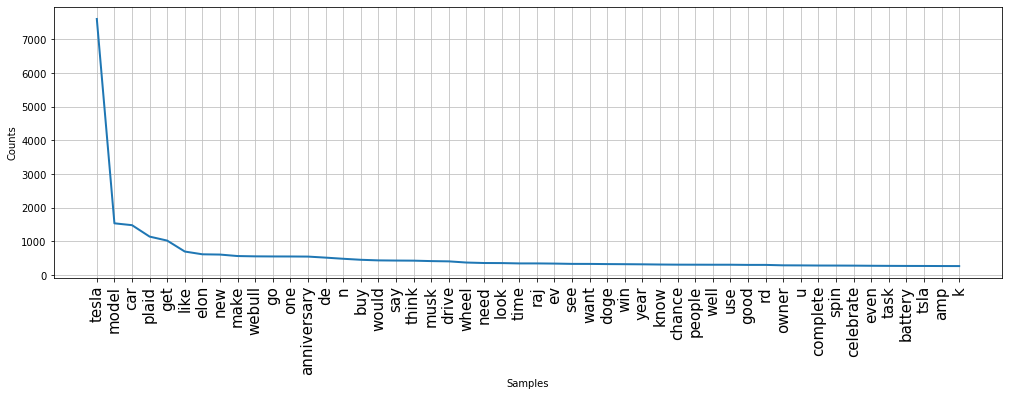

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [43]:
# Plot word frequency distribution of first 50 words

plt.figure(figsize=(17,5))
plt.xticks(fontsize=15, rotation=90)
freq_dist = nltk.FreqDist(w2L)
freq_dist.plot(50,cumulative=False)

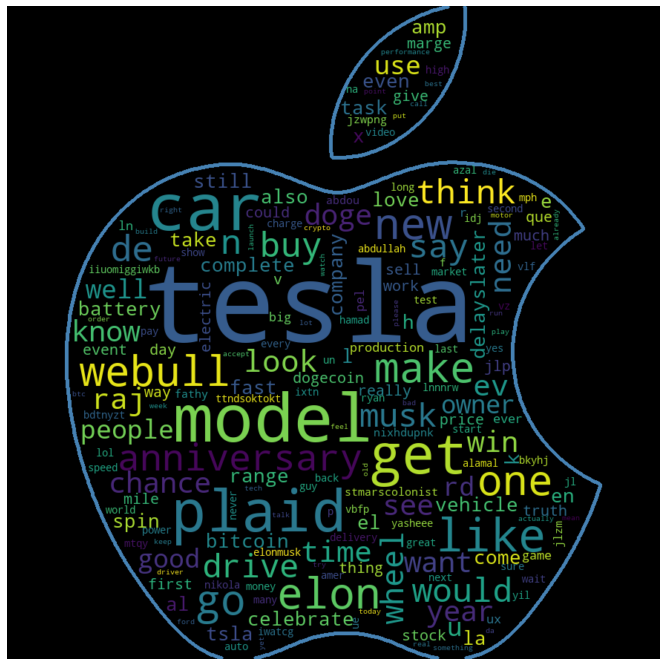

In [46]:
# Word Cloud with word frequencies
import numpy as np
from PIL import Image


custom_mask = np.array(Image.open("./Downloads/apple.png"))
for i in range(len(custom_mask)):
    for j in range(len(custom_mask[i])):
        if custom_mask[i][j] == 1:
            custom_mask[i][j] = 255

wc = WordCloud(max_font_size=150,
               width=700,height=700,contour_width=5, contour_color='steelblue',mask=custom_mask)
wordcloud = wc.generate_from_frequencies(freq_dist)

# wordcloud = wordcloud.generate_from_text(text)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [47]:
# 'tesla, 'tsla', 'musk', 'elon' 제거
##########개선 부분 적기(이름 모두 제거안함)

#위의 그림에서 ev나 de, e 같은 불용어 처럼 보이는 것을 제거하지 않은 이유는 (lol같이) 제가 모르는 
#감탄사 일수도 있을것 같아 제거하지 않았습니다. 

def finish_cleaning(dataframe):
    # 이 부분은 회사 이름이나 회사 ceo이름에 따라 달라질수 있음.
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: x.replace('tesla',''))
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: x.replace('tsla',''))
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: x.replace('musk',''))
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: x.replace('elon',''))

In [48]:
finish_cleaning(tweets)

C:\heejae\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [50]:
tweets.head()
#4번째 칼럼의 tesla 없어짐

,id,tweet,date,clean_tweet
0,1403502284361932800,@Investments_CEO If only dogecoin were more th...,2021-06-12 08:59:55,ceo dogecoin always question everyone doge des...
1,1403502273557417986,@SyncSam123 @MonkeyTreeFrog @And6Is9 @Keem_113...,2021-06-12 08:59:52,johnny
2,1403502270126428167,@Starbuk99 @WilliamRoark17 @Teslarati @Tesla B...,2021-06-12 08:59:51,bro blue collar worker ever lose battle real q...
3,1403502258617257986,Tesla tudo que eu faço essa droga de cena detesta,2021-06-12 08:59:48,tudo que eu fa essa droga de cena detesta
4,1403502246818635776,Why are used Tesla’s more then new ones,2021-06-12 08:59:46,use new one


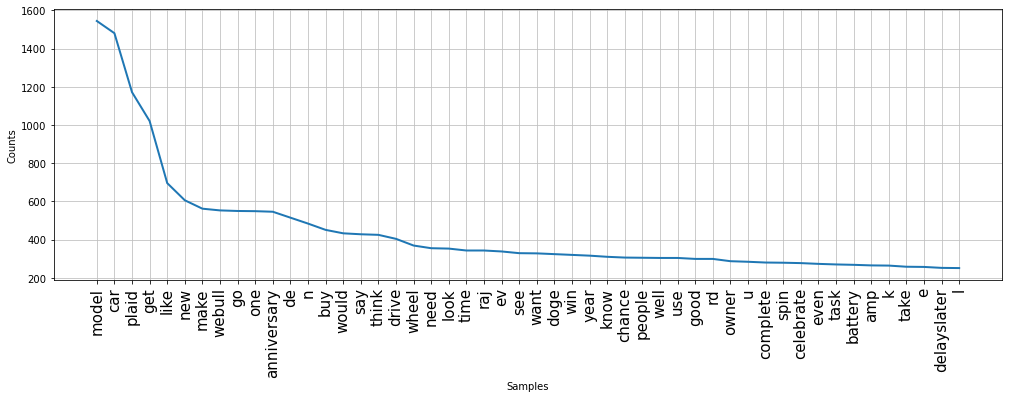

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [52]:
#word to string
w2s = ' '.join([tweet for tweet in tweets.clean_tweet])

#word to list(그래프를 그리기 위해서)
w2L = w2s.split()

# Plot word frequency distribution of first 50 words

plt.figure(figsize=(17,5))
plt.xticks(fontsize=15, rotation=90)
freq_dist = nltk.FreqDist(w2L)
freq_dist.plot(50,cumulative=False)

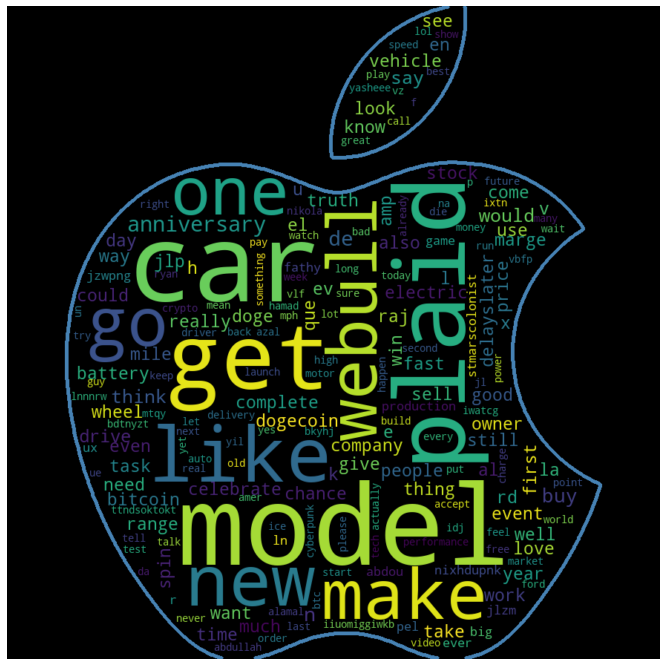

In [53]:
# 크게 써있던 tesla가 제거된 것을 볼 수 있습니다.

wc = WordCloud(max_font_size=150,
               width=700,height=700,contour_width=5, contour_color='steelblue',mask=custom_mask)
wordcloud = wc.generate_from_frequencies(freq_dist)

# wordcloud = wordcloud.generate_from_text(text)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [69]:
# 빈도수를 체크

word_freq = nltk.FreqDist(w2L)
freq_df = pd.DataFrame({'Word': list(word_freq.keys()), 'Count': list(word_freq.values())}).sort_values(by=['Count'], ascending=False)
freq_df.head(20)

,Word,Count
248,model,1545
60,car,1481
102,plaid,1172
8,get,1021
97,like,696
57,new,606
138,make,562
682,webull,553
263,go,550
58,one,549


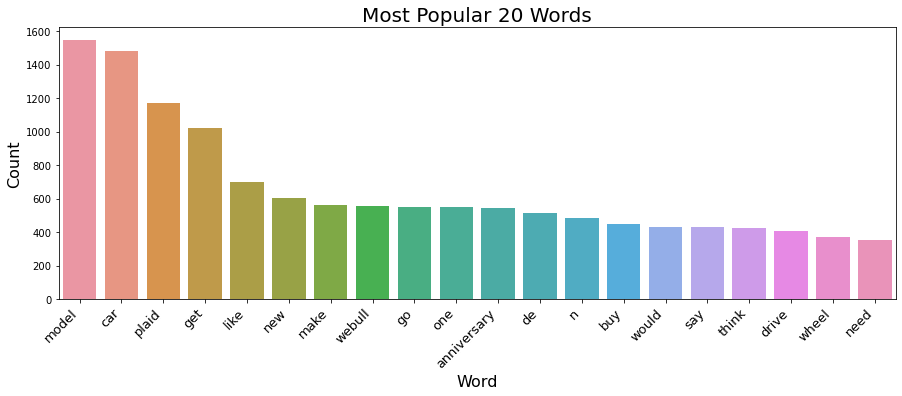

In [68]:
# 빈도수를 히스토그램으로 그리기

freq_df = freq_df.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(15,5))
ax = sns.barplot(data=freq_df, x= "Word", y = "Count")
ax.set_ylabel('Count', fontsize=16)
ax.set_xlabel('Word', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=13)
ax.set_title("Most Popular 20 Words", fontsize=20)
plt.show()

In [115]:
filepath = r'./cleaned_tweet.csv'

tweets.to_csv(filepath, header=True)

tweets = pd.read_csv('cleaned_tweet.csv').drop(['Unnamed: 0'],axis=1)
tweets.head(6)

,id,tweet,date,clean_tweet
0,1403502284361932800,@Investments_CEO If only dogecoin were more th...,2021-06-12 08:59:55,ceo dogecoin always question everyone doge des...
1,1403502273557417986,@SyncSam123 @MonkeyTreeFrog @And6Is9 @Keem_113...,2021-06-12 08:59:52,johnny
2,1403502270126428167,@Starbuk99 @WilliamRoark17 @Teslarati @Tesla B...,2021-06-12 08:59:51,bro blue collar worker ever lose battle real q...
3,1403502258617257986,Tesla tudo que eu faço essa droga de cena detesta,2021-06-12 08:59:48,tudo que eu fa essa droga de cena detesta
4,1403502246818635776,Why are used Tesla’s more then new ones,2021-06-12 08:59:46,use new one
5,1403502219077455873,@elonmusk TESLA is shit car,2021-06-12 08:59:39,shit car


In [97]:
tweets.info()
#null 존재

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10063 entries, 0 to 10062
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           10063 non-null  int64 
 1   tweet        10063 non-null  object
 2   date         10063 non-null  object
 3   clean_tweet  9796 non-null   object
dtypes: int64(1), object(3)
memory usage: 314.6+ KB


In [98]:
#null 개수
tweets.isnull().sum()

id               0
tweet            0
date             0
clean_tweet    267
dtype: int64

In [99]:
#null 제거
tweets = tweets.dropna()

In [48]:
tweets.isnull().sum()

id             0
tweet          0
date           0
clean_tweet    0
dtype: int64

In [138]:
# TextBlob을 이용한 감정분석

from textblob import TextBlob

head=f'| {"Count":5} | '
head+=f'{"Sentiment Score":15} | '
sept = '| '+ '-'*5 + ' | ' + '-'*15 + ' |'
print(head)
print(sept)

pos_score = 0
neg_score = 0
cnt = 0
# for t in tweets['clean_tweet']:
for t in tweets.clean_tweet:
    blob = TextBlob(t)
    print(f'|{cnt+1:5}  | '+  f'{blob.sentiment[0]:<16.5f}'+ '|')
    if blob.sentiment[0] > 0.2:
        pos_score += 1
    elif blob.sentiment[0] < -0.2:
        neg_score += 1
    cnt +=1

| Count | Sentiment Score | 
| ----- | --------------- |
|    1  | 0.00000         |
|    2  | 0.00000         |
|    3  | 0.28333         |
|    4  | 0.00000         |
|    5  | 0.13636         |
|    6  | -0.20000        |
|    7  | 0.00000         |
|    8  | 0.46818         |
|    9  | -0.37500        |
|   10  | 0.00000         |
|   11  | 0.00000         |
|   12  | 0.10000         |
|   13  | 0.00000         |
|   14  | 0.00000         |
|   15  | 0.00000         |
|   16  | -0.25000        |
|   17  | -0.00556        |
|   18  | 0.00000         |
|   19  | 0.00000         |
|   20  | 0.00000         |
|   21  | 0.50000         |
|   22  | 0.00000         |
|   23  | 0.40000         |
|   24  | -0.05000        |
|   25  | 0.00000         |
|   26  | 0.00000         |
|   27  | 0.27879         |
|   28  | 0.00000         |
|   29  | -0.26250        |
|   30  | 0.00000         |
|   31  | 0.00000         |
|   32  | 0.00000         |
|   33  | 0.00000         |
|   34  | 0.00000  

|  394  | 0.10000         |
|  395  | 0.00000         |
|  396  | 0.00000         |
|  397  | 0.00000         |
|  398  | 0.00000         |
|  399  | 0.20000         |
|  400  | 0.20000         |
|  401  | 0.10000         |
|  402  | 0.00000         |
|  403  | 0.00000         |
|  404  | 0.00000         |
|  405  | 0.00000         |
|  406  | 0.45000         |
|  407  | 0.00000         |
|  408  | 0.00000         |
|  409  | 0.00000         |
|  410  | 0.37500         |
|  411  | 0.00000         |
|  412  | -0.30000        |
|  413  | 0.20000         |
|  414  | 0.00000         |
|  415  | 0.50000         |
|  416  | 0.00000         |
|  417  | 0.35000         |
|  418  | -0.05000        |
|  419  | -0.08807        |
|  420  | 0.50000         |
|  421  | 0.00000         |
|  422  | 0.35000         |
|  423  | 0.50000         |
|  424  | 0.31455         |
|  425  | 0.00000         |
|  426  | 0.00000         |
|  427  | 0.25758         |
|  428  | 0.00000         |
|  429  | 0.00000   

|  987  | 0.50000         |
|  988  | 0.00000         |
|  989  | 0.00000         |
|  990  | 0.00000         |
|  991  | 0.50000         |
|  992  | 0.27879         |
|  993  | 0.30000         |
|  994  | 0.00000         |
|  995  | 0.00000         |
|  996  | 0.00000         |
|  997  | 0.00000         |
|  998  | 0.41667         |
|  999  | 0.37500         |
| 1000  | 0.45000         |
| 1001  | -0.09000        |
| 1002  | 0.07857         |
| 1003  | 0.00000         |
| 1004  | 0.12500         |
| 1005  | 0.20000         |
| 1006  | 0.50000         |
| 1007  | 0.21000         |
| 1008  | 0.50000         |
| 1009  | -0.06944        |
| 1010  | 0.03333         |
| 1011  | 0.24107         |
| 1012  | 0.00000         |
| 1013  | 0.00000         |
| 1014  | 0.08929         |
| 1015  | 0.00000         |
| 1016  | 0.20000         |
| 1017  | 0.11818         |
| 1018  | 0.47500         |
| 1019  | 0.20667         |
| 1020  | 0.53000         |
| 1021  | 0.70000         |
| 1022  | 0.00000   

| 1502  | 0.27333         |
| 1503  | 0.00000         |
| 1504  | 0.21104         |
| 1505  | -0.05000        |
| 1506  | 0.00000         |
| 1507  | 0.06667         |
| 1508  | -0.80000        |
| 1509  | 0.12000         |
| 1510  | 0.35000         |
| 1511  | 0.33333         |
| 1512  | 0.45000         |
| 1513  | 0.12500         |
| 1514  | 0.00000         |
| 1515  | 0.00000         |
| 1516  | 0.01667         |
| 1517  | 0.80000         |
| 1518  | 0.00000         |
| 1519  | 0.37879         |
| 1520  | 0.00000         |
| 1521  | 0.30417         |
| 1522  | 0.00000         |
| 1523  | -0.21000        |
| 1524  | 0.60000         |
| 1525  | 0.00000         |
| 1526  | 0.00000         |
| 1527  | 0.00000         |
| 1528  | 0.00000         |
| 1529  | 0.00000         |
| 1530  | 0.00000         |
| 1531  | 0.00000         |
| 1532  | -0.23000        |
| 1533  | 0.50000         |
| 1534  | 0.00000         |
| 1535  | 0.00000         |
| 1536  | 0.17500         |
| 1537  | 0.00000   

| 2078  | 0.00000         |
| 2079  | 0.40000         |
| 2080  | 0.42500         |
| 2081  | 0.00000         |
| 2082  | 0.00000         |
| 2083  | 0.28571         |
| 2084  | 0.00000         |
| 2085  | 0.00000         |
| 2086  | 0.20000         |
| 2087  | 0.25000         |
| 2088  | 0.20000         |
| 2089  | 0.05556         |
| 2090  | 0.00000         |
| 2091  | 0.20000         |
| 2092  | 0.00000         |
| 2093  | 0.00000         |
| 2094  | 0.02323         |
| 2095  | 0.00000         |
| 2096  | 0.00000         |
| 2097  | 0.00000         |
| 2098  | 0.00000         |
| 2099  | -0.10000        |
| 2100  | 0.50000         |
| 2101  | 0.00000         |
| 2102  | 0.40000         |
| 2103  | -0.50000        |
| 2104  | -0.33571        |
| 2105  | 0.19318         |
| 2106  | 0.06667         |
| 2107  | 0.40000         |
| 2108  | 0.25000         |
| 2109  | 0.00000         |
| 2110  | 0.06667         |
| 2111  | 0.00000         |
| 2112  | 0.00000         |
| 2113  | 0.00000   

| 2982  | 0.13750         |
| 2983  | -0.40000        |
| 2984  | 0.25000         |
| 2985  | 0.00000         |
| 2986  | -0.14583        |
| 2987  | 0.00000         |
| 2988  | 0.02500         |
| 2989  | 0.10000         |
| 2990  | 0.70000         |
| 2991  | 0.06818         |
| 2992  | 0.00000         |
| 2993  | 0.00000         |
| 2994  | 0.00000         |
| 2995  | 0.50000         |
| 2996  | 0.12667         |
| 2997  | 0.20000         |
| 2998  | 0.06190         |
| 2999  | 0.37879         |
| 3000  | 0.20000         |
| 3001  | 0.00000         |
| 3002  | 0.20000         |
| 3003  | 0.00000         |
| 3004  | 0.03409         |
| 3005  | 0.00000         |
| 3006  | -0.07143        |
| 3007  | -0.60000        |
| 3008  | 0.45000         |
| 3009  | 0.20000         |
| 3010  | 0.00000         |
| 3011  | 0.00000         |
| 3012  | 0.00000         |
| 3013  | 0.19545         |
| 3014  | 0.10000         |
| 3015  | -0.09444        |
| 3016  | 0.00000         |
| 3017  | 0.45000   

| 3304  | 0.00000         |
| 3305  | 0.22500         |
| 3306  | -0.80000        |
| 3307  | 0.20000         |
| 3308  | 0.00000         |
| 3309  | 0.00000         |
| 3310  | 0.55000         |
| 3311  | -0.20000        |
| 3312  | 0.00000         |
| 3313  | 0.00000         |
| 3314  | 0.10000         |
| 3315  | 0.00000         |
| 3316  | 0.28333         |
| 3317  | -0.30000        |
| 3318  | 0.35000         |
| 3319  | 0.00000         |
| 3320  | -0.15000        |
| 3321  | 0.00250         |
| 3322  | 0.60000         |
| 3323  | 0.00000         |
| 3324  | -0.10714        |
| 3325  | 0.17099         |
| 3326  | 0.00000         |
| 3327  | -0.40000        |
| 3328  | 0.00000         |
| 3329  | 0.00000         |
| 3330  | 0.02500         |
| 3331  | 0.18000         |
| 3332  | 0.90000         |
| 3333  | 0.00000         |
| 3334  | 0.37500         |
| 3335  | 0.33333         |
| 3336  | 0.00000         |
| 3337  | 0.06818         |
| 3338  | 0.00000         |
| 3339  | 0.40000   

| 3630  | 0.00000         |
| 3631  | 0.00000         |
| 3632  | 0.04545         |
| 3633  | 0.37500         |
| 3634  | -0.13333        |
| 3635  | 0.00000         |
| 3636  | 0.12500         |
| 3637  | 0.00000         |
| 3638  | -0.15000        |
| 3639  | 0.06667         |
| 3640  | 0.65000         |
| 3641  | 0.00000         |
| 3642  | 0.22538         |
| 3643  | 0.00000         |
| 3644  | 0.00000         |
| 3645  | 0.30333         |
| 3646  | 0.00000         |
| 3647  | 0.16212         |
| 3648  | -0.27500        |
| 3649  | 0.00000         |
| 3650  | 0.00000         |
| 3651  | 0.00000         |
| 3652  | 0.80000         |
| 3653  | 0.00000         |
| 3654  | 0.07273         |
| 3655  | 0.00000         |
| 3656  | 0.30000         |
| 3657  | -0.10000        |
| 3658  | -0.25000        |
| 3659  | 0.20000         |
| 3660  | 0.00000         |
| 3661  | -0.17708        |
| 3662  | 0.00000         |
| 3663  | 0.10000         |
| 3664  | 0.00000         |
| 3665  | 0.00000   

| 4148  | 0.50000         |
| 4149  | 0.33333         |
| 4150  | 0.00000         |
| 4151  | 0.00000         |
| 4152  | 0.00000         |
| 4153  | 0.00000         |
| 4154  | 0.00000         |
| 4155  | 0.13636         |
| 4156  | 0.00000         |
| 4157  | 0.00000         |
| 4158  | 0.60000         |
| 4159  | 0.10000         |
| 4160  | 0.00000         |
| 4161  | 0.60000         |
| 4162  | 0.18000         |
| 4163  | 0.50000         |
| 4164  | 0.00000         |
| 4165  | 0.00000         |
| 4166  | 0.13333         |
| 4167  | 0.00000         |
| 4168  | 0.00000         |
| 4169  | 0.50000         |
| 4170  | 0.10000         |
| 4171  | 0.13750         |
| 4172  | 0.70000         |
| 4173  | 0.00000         |
| 4174  | 0.12727         |
| 4175  | 0.00000         |
| 4176  | 0.00000         |
| 4177  | 0.31818         |
| 4178  | 0.70000         |
| 4179  | 0.60000         |
| 4180  | 0.00000         |
| 4181  | 0.00000         |
| 4182  | 0.00000         |
| 4183  | 0.50000   

| 4571  | 0.23750         |
| 4572  | -0.10000        |
| 4573  | 0.40000         |
| 4574  | 0.10417         |
| 4575  | 0.00000         |
| 4576  | 0.25000         |
| 4577  | 0.23750         |
| 4578  | 0.21429         |
| 4579  | 0.00000         |
| 4580  | 0.20000         |
| 4581  | 0.00000         |
| 4582  | 0.25000         |
| 4583  | 0.00000         |
| 4584  | 0.00000         |
| 4585  | 0.00000         |
| 4586  | -0.03333        |
| 4587  | 0.00000         |
| 4588  | 0.00000         |
| 4589  | 0.00000         |
| 4590  | 0.70000         |
| 4591  | 0.00000         |
| 4592  | 0.00000         |
| 4593  | 0.00000         |
| 4594  | 0.00000         |
| 4595  | 0.00000         |
| 4596  | 0.50000         |
| 4597  | 0.00000         |
| 4598  | 0.13212         |
| 4599  | 0.00000         |
| 4600  | -0.27500        |
| 4601  | 0.20000         |
| 4602  | 0.70000         |
| 4603  | 0.00000         |
| 4604  | 0.00000         |
| 4605  | 0.00000         |
| 4606  | 0.70000   

| 5043  | 0.00000         |
| 5044  | 0.00000         |
| 5045  | 0.00000         |
| 5046  | 0.09524         |
| 5047  | 0.00000         |
| 5048  | 0.31250         |
| 5049  | 0.00000         |
| 5050  | 0.00000         |
| 5051  | 0.00000         |
| 5052  | 0.80000         |
| 5053  | -0.02381        |
| 5054  | 0.31000         |
| 5055  | 0.00000         |
| 5056  | 0.00000         |
| 5057  | 0.00000         |
| 5058  | -0.40000        |
| 5059  | 0.00000         |
| 5060  | 0.00000         |
| 5061  | 0.60000         |
| 5062  | 0.45000         |
| 5063  | 0.60000         |
| 5064  | 0.00000         |
| 5065  | 0.13636         |
| 5066  | -0.33750        |
| 5067  | 0.00000         |
| 5068  | 0.19167         |
| 5069  | -0.31875        |
| 5070  | 0.25000         |
| 5071  | 0.23333         |
| 5072  | 0.00000         |
| 5073  | 0.11786         |
| 5074  | -0.05000        |
| 5075  | 0.27750         |
| 5076  | 0.00000         |
| 5077  | 0.00000         |
| 5078  | 0.00000   

| 5461  | 0.65000         |
| 5462  | 0.00000         |
| 5463  | 0.00000         |
| 5464  | -0.25000        |
| 5465  | 0.30000         |
| 5466  | 0.00000         |
| 5467  | 0.10000         |
| 5468  | -0.40000        |
| 5469  | 0.00000         |
| 5470  | 0.00000         |
| 5471  | 0.20000         |
| 5472  | -0.01250        |
| 5473  | 0.00000         |
| 5474  | 0.00000         |
| 5475  | 0.00000         |
| 5476  | 0.30833         |
| 5477  | 0.00000         |
| 5478  | 0.40000         |
| 5479  | 0.00000         |
| 5480  | 0.00000         |
| 5481  | 0.00000         |
| 5482  | -0.80000        |
| 5483  | 0.00000         |
| 5484  | 0.00000         |
| 5485  | 0.00000         |
| 5486  | -0.50000        |
| 5487  | -0.29167        |
| 5488  | 0.00000         |
| 5489  | -0.25000        |
| 5490  | 0.21111         |
| 5491  | 0.28750         |
| 5492  | 0.50000         |
| 5493  | 0.00000         |
| 5494  | -0.20000        |
| 5495  | 0.40000         |
| 5496  | 0.07500   

| 5867  | 0.00000         |
| 5868  | 0.70000         |
| 5869  | 0.00000         |
| 5870  | 0.00000         |
| 5871  | 0.21667         |
| 5872  | 0.00000         |
| 5873  | 0.00000         |
| 5874  | -0.40000        |
| 5875  | 0.22090         |
| 5876  | 0.10000         |
| 5877  | 0.00000         |
| 5878  | 0.00000         |
| 5879  | 0.00000         |
| 5880  | -0.07778        |
| 5881  | 0.50000         |
| 5882  | 0.13636         |
| 5883  | 0.00000         |
| 5884  | 0.00000         |
| 5885  | 0.20000         |
| 5886  | 0.13636         |
| 5887  | 0.00000         |
| 5888  | 0.20000         |
| 5889  | -0.80000        |
| 5890  | 0.00000         |
| 5891  | 0.13636         |
| 5892  | 0.00000         |
| 5893  | 0.20000         |
| 5894  | 0.00000         |
| 5895  | -0.11310        |
| 5896  | 0.00000         |
| 5897  | 0.00000         |
| 5898  | 0.06818         |
| 5899  | 0.00000         |
| 5900  | 0.20000         |
| 5901  | 0.00000         |
| 5902  | 0.10417   

| 6326  | 0.29333         |
| 6327  | 0.45000         |
| 6328  | 0.11000         |
| 6329  | 0.00000         |
| 6330  | 0.00000         |
| 6331  | 0.00000         |
| 6332  | 0.10381         |
| 6333  | 0.00000         |
| 6334  | 0.00000         |
| 6335  | 0.13636         |
| 6336  | 0.60000         |
| 6337  | 0.20000         |
| 6338  | 0.26667         |
| 6339  | 0.00000         |
| 6340  | -0.33333        |
| 6341  | 0.00000         |
| 6342  | 0.00000         |
| 6343  | 0.00000         |
| 6344  | 0.30000         |
| 6345  | 0.00000         |
| 6346  | 0.33333         |
| 6347  | 0.10000         |
| 6348  | 0.32500         |
| 6349  | 0.10000         |
| 6350  | 0.03000         |
| 6351  | -0.02857        |
| 6352  | 0.45000         |
| 6353  | -0.02292        |
| 6354  | 0.06629         |
| 6355  | 0.00000         |
| 6356  | 0.00000         |
| 6357  | 0.00000         |
| 6358  | 0.00000         |
| 6359  | 0.00000         |
| 6360  | 0.00000         |
| 6361  | 0.00000   

| 6801  | -0.60000        |
| 6802  | 0.00000         |
| 6803  | 0.16500         |
| 6804  | -0.15000        |
| 6805  | 0.00000         |
| 6806  | 0.00000         |
| 6807  | 0.20000         |
| 6808  | 0.00000         |
| 6809  | -0.09286        |
| 6810  | 0.00000         |
| 6811  | 0.00000         |
| 6812  | -0.16667        |
| 6813  | -0.07500        |
| 6814  | 0.00000         |
| 6815  | 0.00000         |
| 6816  | 0.00000         |
| 6817  | 0.00000         |
| 6818  | 0.00000         |
| 6819  | -0.50000        |
| 6820  | 0.35714         |
| 6821  | 0.00000         |
| 6822  | 0.20000         |
| 6823  | -0.15000        |
| 6824  | 0.00000         |
| 6825  | -0.25000        |
| 6826  | 0.16818         |
| 6827  | 0.21667         |
| 6828  | 0.00000         |
| 6829  | 0.10000         |
| 6830  | 0.00000         |
| 6831  | 0.00000         |
| 6832  | -0.30000        |
| 6833  | 0.00000         |
| 6834  | 0.00000         |
| 6835  | 0.13636         |
| 6836  | -0.07500  

| 7337  | 0.00000         |
| 7338  | 0.00000         |
| 7339  | 0.00000         |
| 7340  | 0.10000         |
| 7341  | 0.25000         |
| 7342  | -0.00338        |
| 7343  | 0.15000         |
| 7344  | 0.58333         |
| 7345  | 0.00000         |
| 7346  | 0.13636         |
| 7347  | 0.13636         |
| 7348  | 0.13636         |
| 7349  | 0.00000         |
| 7350  | 0.15000         |
| 7351  | -0.17292        |
| 7352  | -0.40833        |
| 7353  | 0.30556         |
| 7354  | 0.61667         |
| 7355  | 0.00000         |
| 7356  | 0.00000         |
| 7357  | 0.00000         |
| 7358  | 0.35000         |
| 7359  | 0.00000         |
| 7360  | 0.00000         |
| 7361  | 0.09659         |
| 7362  | 0.00000         |
| 7363  | 0.26818         |
| 7364  | 0.00000         |
| 7365  | 0.13636         |
| 7366  | 0.00000         |
| 7367  | -0.50000        |
| 7368  | 0.00000         |
| 7369  | 0.00000         |
| 7370  | 0.15000         |
| 7371  | -0.05625        |
| 7372  | 0.00000   

| 7754  | 0.00000         |
| 7755  | 0.57857         |
| 7756  | 0.00000         |
| 7757  | 0.57500         |
| 7758  | 0.80000         |
| 7759  | 0.60000         |
| 7760  | -0.07083        |
| 7761  | 0.85000         |
| 7762  | 0.00000         |
| 7763  | 0.13636         |
| 7764  | 0.00000         |
| 7765  | 0.00000         |
| 7766  | -0.23333        |
| 7767  | -0.43333        |
| 7768  | 0.50000         |
| 7769  | -0.22500        |
| 7770  | 0.00000         |
| 7771  | 0.00000         |
| 7772  | 0.00000         |
| 7773  | 1.00000         |
| 7774  | 0.13636         |
| 7775  | 0.35000         |
| 7776  | 0.00000         |
| 7777  | 0.00000         |
| 7778  | 0.00000         |
| 7779  | 0.26786         |
| 7780  | 0.00000         |
| 7781  | 0.45000         |
| 7782  | 0.50000         |
| 7783  | 0.00000         |
| 7784  | 0.00000         |
| 7785  | 0.00000         |
| 7786  | 0.00000         |
| 7787  | 0.00000         |
| 7788  | 0.70000         |
| 7789  | 0.00000   

| 8198  | -0.01278        |
| 8199  | 0.00000         |
| 8200  | 0.00000         |
| 8201  | 0.45000         |
| 8202  | 1.00000         |
| 8203  | -0.38667        |
| 8204  | 0.10000         |
| 8205  | -0.08333        |
| 8206  | 0.23485         |
| 8207  | -0.13889        |
| 8208  | -0.60000        |
| 8209  | 0.40000         |
| 8210  | 0.06818         |
| 8211  | 0.00000         |
| 8212  | -0.40000        |
| 8213  | 0.00000         |
| 8214  | 0.00000         |
| 8215  | -0.10000        |
| 8216  | 0.00000         |
| 8217  | -0.05000        |
| 8218  | -0.10000        |
| 8219  | 0.36667         |
| 8220  | 0.00000         |
| 8221  | 0.06818         |
| 8222  | 0.00000         |
| 8223  | 0.05000         |
| 8224  | 0.31818         |
| 8225  | -0.75000        |
| 8226  | 0.60000         |
| 8227  | 0.00000         |
| 8228  | 0.10000         |
| 8229  | -0.03333        |
| 8230  | -0.02500        |
| 8231  | 0.10727         |
| 8232  | 0.62500         |
| 8233  | 0.35000   

| 8798  | 0.00000         |
| 8799  | 0.00000         |
| 8800  | 0.00000         |
| 8801  | -0.30000        |
| 8802  | 0.00000         |
| 8803  | -0.05556        |
| 8804  | 0.00000         |
| 8805  | 0.00000         |
| 8806  | -0.80000        |
| 8807  | 0.03333         |
| 8808  | 0.10714         |
| 8809  | 0.51364         |
| 8810  | 0.45000         |
| 8811  | 0.45000         |
| 8812  | 0.00000         |
| 8813  | 0.45000         |
| 8814  | 0.00000         |
| 8815  | 0.63333         |
| 8816  | 0.13636         |
| 8817  | 0.00000         |
| 8818  | -0.08333        |
| 8819  | 0.10000         |
| 8820  | 0.00000         |
| 8821  | -0.40000        |
| 8822  | 0.00000         |
| 8823  | 0.00000         |
| 8824  | 0.00000         |
| 8825  | 0.00000         |
| 8826  | -0.10000        |
| 8827  | 0.11667         |
| 8828  | 0.00000         |
| 8829  | -0.50000        |
| 8830  | 0.00000         |
| 8831  | 0.00000         |
| 8832  | 0.20000         |
| 8833  | 0.13636   

| 9412  | 0.45000         |
| 9413  | 0.50000         |
| 9414  | 0.45000         |
| 9415  | -0.18182        |
| 9416  | -0.40000        |
| 9417  | 0.02500         |
| 9418  | 0.45000         |
| 9419  | 0.00000         |
| 9420  | 0.00000         |
| 9421  | 0.15833         |
| 9422  | -0.02500        |
| 9423  | 0.00000         |
| 9424  | 0.45000         |
| 9425  | 0.00000         |
| 9426  | 0.45000         |
| 9427  | 0.00000         |
| 9428  | 0.23990         |
| 9429  | 0.45000         |
| 9430  | 0.00000         |
| 9431  | 0.45000         |
| 9432  | 0.30000         |
| 9433  | -0.02500        |
| 9434  | 0.40000         |
| 9435  | 0.50000         |
| 9436  | 0.45000         |
| 9437  | 0.45000         |
| 9438  | 0.20000         |
| 9439  | 0.45000         |
| 9440  | 0.45000         |
| 9441  | 0.45000         |
| 9442  | -0.02500        |
| 9443  | 0.00000         |
| 9444  | 0.80000         |
| 9445  | -0.30000        |
| 9446  | 0.45000         |
| 9447  | 0.00000   

In [139]:
#긍정 개수
print(pos_score)
#부정 개수
print(neg_score)

2265


622

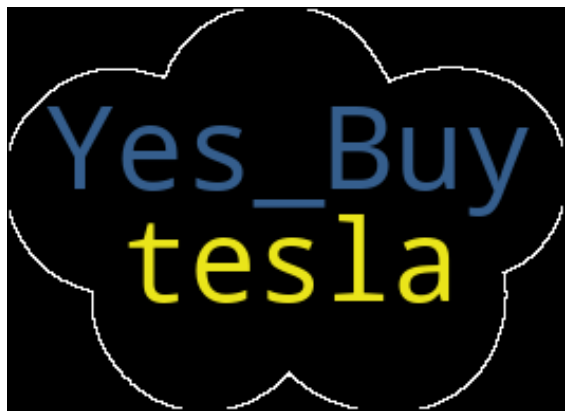

In [18]:
# Word Cloud with recommendation
# pos_score = 2265
# neg_score = 622
# 긍정 개수가 부정 개수의 3배 보다 크면 해당 회사의 주식을 사라고 추천(wordcloud로 보여줌)
if pos_score/neg_score > 3:
    text = "Yes_Buy " + company
else:
    text = "Do_Not_Buy " + company

custom_mask = np.array(Image.open("./Downloads/cloud.png"))
for i in range(len(custom_mask)):
    for j in range(len(custom_mask[i])):
        if custom_mask[i][j] == 1:
            custom_mask[i][j] = 255

wc = WordCloud(max_font_size=150,
               width=700,height=700,contour_width=1, contour_color='white',mask=custom_mask)
wordcloud = wc.generate_from_text(text)

# wordcloud = wordcloud.generate_from_text(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()